In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad
import scAR

import warnings
warnings.simplefilter("ignore")

In [ ]:
from matplotlib import pylab

params = {'legend.fontsize': 8,
          'figure.facecolor':"w",
          'figure.figsize': (6, 4.5),
         'axes.labelsize': 10,
         'axes.titlesize':10,
         'axes.linewidth': 0.5,
         'xtick.labelsize':8,
         'ytick.labelsize':8,
         'axes.grid':False,}
pylab.rc('font',**{'family':'serif','serif':['Palatino'],'size':10})
pylab.rcParams.update(params);

sns.set_palette("muted");
sns.set_style("ticks");

## testing stuff

In [53]:
test_bcs = pd.read_csv('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW22_221118/GW22_221118_S1/Final_Barcodes.tsv',
                           sep='\t')

In [56]:
test_bcs.loc[0:10,]

,CBC,barcode,UMI_Count
0,AAACCCAAGACGCCAA,IndexE_Bit1_F_223-Bit2_F_067-Bit3_F_452t,1
1,AAACCCAAGCCAAGGT,Index3_Bit1_F_309-Bit2_F_370-Bit3_F_298t,1
2,AAACCCAAGCGAGGAG,Index3_Bit1_F_366-Bit2_F_130-Bit3_F_217t,1
3,AAACCCAAGCTGTACT,IndexE_Bit1_F_165-Bit2_F_160-Bit3_F_280t,1
4,AAACCCAAGGACAACC,Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t,1
5,AAACCCAAGGACAGTC,Index3_Bit1_F_097-Bit2_F_324-Bit3_F_489t,1
6,AAACCCAAGGACAGTC,Index3_Bit1_F_122-Bit2_F_048-Bit3_F_055t,1
7,AAACCCAAGGACAGTC,Index3_Bit1_F_343-Bit2_F_038-Bit3_F_167t,1
8,AAACCCAAGGACAGTC,Index3_Bit1_F_497-Bit2_F_172-Bit3_F_246t,1
9,AAACCCAAGGACAGTC,IndexE_Bit1_F_021-Bit2_F_447-Bit3_F_305t,1


In [52]:
test_bcs['CBC'][0:10]

0    AAACCCAAGACGCCAA
1    AAACCCAAGCCAAGGT
2    AAACCCAAGCGAGGAG
3    AAACCCAAGCTGTACT
4    AAACCCAAGGACAACC
5    AAACCCAAGGACAGTC
6    AAACCCAAGGACAGTC
7    AAACCCAAGGACAGTC
8    AAACCCAAGGACAGTC
9    AAACCCAAGGACAGTC
Name: CBC, dtype: object

In [26]:
len(np.unique(test_bcs['barcode']))

15572

In [28]:
test_bcs['UMI_Count'].value_counts()

1      553833
2       33038
3        7416
4        2819
5        1400
        ...  
158         1
59          1
75          1
135         1
210         1
Name: UMI_Count, Length: 114, dtype: int64

In [46]:
test_bcs[test_bcs['CBC'].isin(['AAACCCAAGACCTTTG'])]

,CBC,barcode,UMI_Count


In [119]:
test_bcs

,CBC,barcode,UMI_Count
AAACCCAAGACGCCAA,AAACCCAAGACGCCAA,IndexE_Bit1_F_223-Bit2_F_067-Bit3_F_452t,1
AAACCCAAGCCAAGGT,AAACCCAAGCCAAGGT,Index3_Bit1_F_309-Bit2_F_370-Bit3_F_298t,1
AAACCCAAGCGAGGAG,AAACCCAAGCGAGGAG,Index3_Bit1_F_366-Bit2_F_130-Bit3_F_217t,1
AAACCCAAGCTGTACT,AAACCCAAGCTGTACT,IndexE_Bit1_F_165-Bit2_F_160-Bit3_F_280t,1
AAACCCAAGGACAACC,AAACCCAAGGACAACC,Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t,1
...,...,...,...
TTTGTTGTCTTCTTCC,TTTGTTGTCTTCTTCC,Index3_Bit1_F_488-Bit2_F_084-Bit3_F_090t,1
TTTGTTGTCTTCTTCC,TTTGTTGTCTTCTTCC,IndexE_Bit1_F_414-Bit2_F_155-Bit3_F_038t,1
TTTGTTGTCTTGCGCT,TTTGTTGTCTTGCGCT,IndexE_Bit1_F_180-Bit2_F_003-Bit3_F_436t,1
TTTGTTGTCTTTACAC,TTTGTTGTCTTTACAC,Index3_Bit1_F_426-Bit2_F_325-Bit3_F_287t,1


In [63]:
bc_matrix = np.zeros((len(np.unique(test_bcs['CBC'])), len(np.unique(test_bcs['barcode']))))

In [67]:
cbc_names = np.unique(test_bcs['CBC'])
bc_names = np.unique(test_bcs['barcode'])

In [68]:
bc_matrix.shape

(103532, 15572)

In [71]:
test_bcs.iloc[4,:]['UMI_Count']

1

In [78]:
bc_df = pd.DataFrame(bc_matrix, index=list(cbc_names), columns=list(bc_names))

In [79]:
bc_df

,Index1_Bit1_F_006-Bit2_F_041-Bit3_F_011t,Index1_Bit1_F_008-Bit2_F_201-Bit3_F_487t,Index1_Bit1_F_008-Bit2_F_329-Bit3_F_401t,Index1_Bit1_F_010-Bit2_F_244-Bit3_F_211t,Index1_Bit1_F_014-Bit2_F_122-Bit3_F_208t,Index1_Bit1_F_016-Bit2_F_240-Bit3_F_325t,Index1_Bit1_F_026-Bit2_F_155-Bit3_F_005t,Index1_Bit1_F_032-Bit2_F_308-Bit3_F_315t,Index1_Bit1_F_038-Bit2_F_092-Bit3_F_123t,Index1_Bit1_F_045-Bit2_F_350-Bit3_F_193t,...,IndexE_Bit1_F_500-Bit2_F_236-Bit3_F_307t,IndexE_Bit1_F_500-Bit2_F_236-Bit3_F_371t,IndexE_Bit1_F_500-Bit2_F_246-Bit3_F_250t,IndexE_Bit1_F_500-Bit2_F_318-Bit3_F_403t,IndexE_Bit1_F_500-Bit2_F_350-Bit3_F_456t,IndexE_Bit1_F_500-Bit2_F_365-Bit3_F_163t,IndexE_Bit1_F_500-Bit2_F_429-Bit3_F_437t,IndexE_Bit1_F_500-Bit2_F_468-Bit3_F_278t,IndexE_Bit1_F_500-Bit2_F_468-Bit3_F_341t,IndexE_Bit1_F_500-Bit2_F_479-Bit3_F_343t
AAACCCAAGACGCCAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCAAGCCAAGGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCAAGCGAGGAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCAAGCTGTACT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCAAGGACAACC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCTGTAACG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGTCTTCACGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGTCTTCTTCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGTCTTGCGCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
test_bcs_reshape = test_bcs

In [101]:
test_bcs_reshape.index = list(test_bcs_reshape['CBC'])

In [108]:
bc_df.index[bc_df.index.isin(test_bcs['CBC'][test_bcs['barcode']=='Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t'])] == test_bcs_reshape.index[test_bcs_reshape['barcode']=='Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [104]:
bc_df.loc[bc_df.index.isin(test_bcs['CBC'][test_bcs['barcode']=='Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t']),
         bc_df.columns=='Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t'] = test_bcs_reshape.loc[test_bcs_reshape['barcode']=='Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t','UMI_Count']

In [109]:
bc_df.loc[bc_df.index.isin(test_bcs['CBC'][test_bcs['barcode']=='Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t']),
         bc_df.columns=='Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t']

,Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t
AAACCCAAGGACAACC,1.0
AACGAAATCAAGCCAT,3.0
AAGGAATAGGTTCAGG,1.0
AATCACGCAAACAGGC,1.0
AATCGACGTAGCGTCC,2.0
...,...
TTTCATGAGATGTTGA,1.0
TTTGACTAGTCTGGTT,1.0
TTTGACTGTACGTACT,1.0
TTTGGTTGTCGTTATG,1.0


In [112]:
bc_df.loc[:,bc_df.columns=='Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t']

,Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t
AAACCCAAGACGCCAA,0.0
AAACCCAAGCCAAGGT,0.0
AAACCCAAGCGAGGAG,0.0
AAACCCAAGCTGTACT,0.0
AAACCCAAGGACAACC,1.0
...,...
TTTGTTGTCTGTAACG,0.0
TTTGTTGTCTTCACGC,0.0
TTTGTTGTCTTCTTCC,0.0
TTTGTTGTCTTGCGCT,0.0


In [114]:
sum(np.array(bc_df.loc[:,bc_df.columns=='Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t']))

array([226.])

In [94]:
test_bcs.loc[test_bcs['barcode']=='Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t','UMI_Count']

,CBC,barcode,UMI_Count
4,AAACCCAAGGACAACC,Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t,1
14062,AACGAAATCAAGCCAT,Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t,3
24057,AAGGAATAGGTTCAGG,Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t,1
27310,AATCACGCAAACAGGC,Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t,1
28363,AATCGACGTAGCGTCC,Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t,2
...,...,...,...
597740,TTTCATGAGATGTTGA,Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t,1
599253,TTTGACTAGTCTGGTT,Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t,1
599972,TTTGACTGTACGTACT,Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t,1
601776,TTTGGTTGTCGTTATG,Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t,1


In [115]:
sum(test_bcs.loc[test_bcs['barcode']=='Index3_Bit1_F_007-Bit2_F_331-Bit3_F_247t','UMI_Count'])

226

In [47]:
gw22_1118_s1_sticr_raw

,Index3_Bit1_F_243-Bit2_F_336-Empty_Bit3,Index3_Bit1_F_365-Bit2_F_410-Bit3_F_328,Index3_Bit1_F_153-Bit2_F_331-Bit3_F_457,Index3_Bit1_F_032-Bit2_F_324-Bit3_F_256,Index3_Bit1_F_156-Bit2_F_079-Bit3_F_220,Index3_Bit1_F_328-Bit2_F_499-Bit3_F_091,Index3_Bit1_F_009-Bit2_F_281-Bit3_F_407,Index3_Bit1_F_032-Bit2_F_324-Bit3_F_433,Index3_Bit1_F_035-Bit2_F_421-Bit3_F_102,Index3_Bit1_F_069-Bit2_F_097-Bit3_F_176,...,Index3_Bit1_F_285-Bit2_F_174-Bit3_F_128,Index3_Bit1_F_497-Bit2_F_094-Bit3_F_113,Index3_Bit1_F_027-Bit2_F_495-Bit3_F_272,Index3_Bit1_F_105-Bit2_F_130-Bit3_F_210,Index3_Bit1_F_486-Bit2_F_257-Bit3_F_080,Index3_Bit1_F_103-Bit2_F_141-Bit3_F_300,Index3_Bit1_F_161-Bit2_F_257-Bit3_F_355,Index3_Bit1_F_122-Bit2_F_001-Bit3_F_189,Index3_Bit1_F_493-Bit2_F_075-Bit3_F_202,Index3_Bit1_F_381-Bit2_F_308-Bit3_F_171
AAACCCAAGAAATGGG,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCAAGACATATG,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCAAGACCTTTG,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCAAGATCGCCC,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCAAGATTGTGA,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCCGTGTGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGTCGACCTAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGTCGCATTAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGTCTACGCAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
#new processing for 221118 S1:

In [118]:
sticr_tsv = pd.read_csv('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW22_221118/GW22_221118_S1/Final_Barcodes.tsv',
                           sep='\t')
sticr_tsv.index = list(sticr_tsv['CBC'])

In [121]:
cbc_names = np.unique(test_bcs['CBC'])
bc_names = np.unique(test_bcs['barcode'])
bc_matrix = np.zeros((len(np.unique(cbc_names)), len(np.unique(bc_names))))
bc_df = pd.DataFrame(bc_matrix, index=list(cbc_names), columns=list(bc_names))

In [130]:
from tqdm import tqdm

for sbc in tqdm(bc_names):
    bc_df.loc[bc_df.index.isin(sticr_tsv['CBC'][sticr_tsv['barcode']==sbc]), bc_df.columns==sbc] = sticr_tsv.loc[sticr_tsv['barcode']==sbc,'UMI_Count']

100%|██████████| 15572/15572 [18:52<00:00, 13.75it/s]


In [137]:
from scipy.sparse import csr_matrix
import h5sparse
import h5py
import anndata
bc_df_sparse = csr_matrix(bc_df)

In [158]:
bc_df_reformat = pd.DataFrame.sparse.from_spmatrix(bc_df_sparse, index=bc_df.index, columns=bc_df.columns)
bc_df_sc_input = anndata.AnnData(bc_df_reformat)
bc_df_sc_input.write_h5ad('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW22_221118/GW22_221118_S1_bc_matrix_sparse.h5ad')
sc_input.write_h5ad('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW22_221118/GW22_221118_S1_bc_matrix_sparse.h5ad')

## new processing for 221118 S1:

In [176]:
rna = '/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/cellranger_outs/GW22_221118_sub_FBS_S1_cellranger/raw_feature_bc_matrix.h5'
sticr = '/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW22_221118/GW22_221118_S1_bc_matrix_sparse.h5ad'
out = '/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW22_221118/GW22_221118_S1_scAR_bcs.csv'
gw22_1118_s1 = sc.read_10x_h5(filename=rna, gex_only=True) # Change this if ur using a different scRNA-seq format
gw22_1118_s1_sticr = sticr
gw22_1118_s1_sticr_raw = gw22_1118_s1_sticr.to_df()
gw22_1118_s1_sticr.var_names_make_unique()

In [177]:
#have to fix the names in the RNA file to remove the -1 from the CBC
fixed_rna_names = gw22_1118_s1.obs_names.tolist()
for c in range(0, len(fixed_rna_names)):
    fixed_rna_names[c] = fixed_rna_names[c][0:-2]
print(fixed_rna_names[0:10])
print(gw22_1118_s1.obs_names[0:10].tolist())

['AAACCCAAGAAACCCA', 'AAACCCAAGAAACCCG', 'AAACCCAAGAAACTAC', 'AAACCCAAGAAACTCA', 'AAACCCAAGAAAGCGA', 'AAACCCAAGAAAGGAT', 'AAACCCAAGAAAGTCT', 'AAACCCAAGAAATGGG', 'AAACCCAAGAACCGCA', 'AAACCCAAGAAGATCT']
['AAACCCAAGAAACCCA-1', 'AAACCCAAGAAACCCG-1', 'AAACCCAAGAAACTAC-1', 'AAACCCAAGAAACTCA-1', 'AAACCCAAGAAAGCGA-1', 'AAACCCAAGAAAGGAT-1', 'AAACCCAAGAAAGTCT-1', 'AAACCCAAGAAATGGG-1', 'AAACCCAAGAACCGCA-1', 'AAACCCAAGAAGATCT-1']


In [178]:
gw22_1118_s1.obs_names = fixed_rna_names
print(gw22_1118_s1.obs_names[:10].tolist())
print(gw22_1118_s1_sticr.obs_names[:10].tolist())

['AAACCCAAGAAACCCA', 'AAACCCAAGAAACCCG', 'AAACCCAAGAAACTAC', 'AAACCCAAGAAACTCA', 'AAACCCAAGAAAGCGA', 'AAACCCAAGAAAGGAT', 'AAACCCAAGAAAGTCT', 'AAACCCAAGAAATGGG', 'AAACCCAAGAACCGCA', 'AAACCCAAGAAGATCT']
['AAACCCAAGACGCCAA', 'AAACCCAAGCCAAGGT', 'AAACCCAAGCGAGGAG', 'AAACCCAAGCTGTACT', 'AAACCCAAGGACAACC', 'AAACCCAAGGACAGTC', 'AAACCCAAGGATTACA', 'AAACCCAAGGGCAGTC', 'AAACCCAAGGTAGCCA', 'AAACCCAAGTAGAATC']


In [179]:
rank_UMIs = pd.DataFrame(gw22_1118_s1[:,gw22_1118_s1.var['feature_types']=='Gene Expression'].X.sum(axis=1), index = gw22_1118_s1.obs_names, columns=['total_counts'])
rank_UMIs['droplets'] = 'cell-free droplets'
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>50, 'droplet II')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>100, 'droplet I')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>500, 'cells')
rank_UMIs = rank_UMIs.sort_values(by='total_counts', ascending=False).reset_index().rename_axis("rank").reset_index()
rank_UMIs = rank_UMIs.loc[rank_UMIs['total_counts']>0]
rank_UMIs = rank_UMIs.set_index('index').rename_axis('cells')

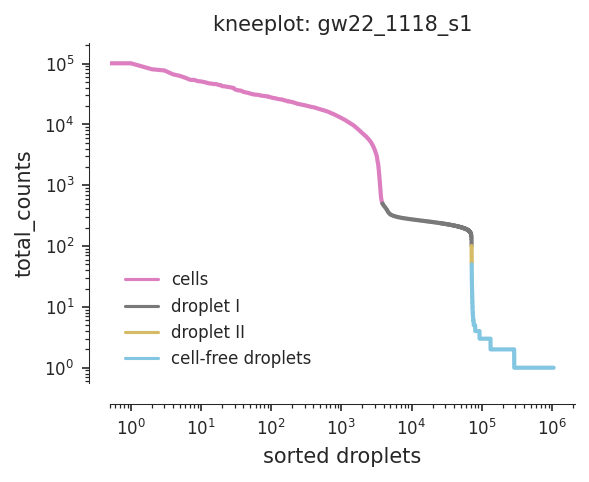

In [180]:
plt.figure(figsize=(4, 3), dpi=150)

ax = sns.lineplot(data = rank_UMIs,
                  x='rank',
                  y='total_counts',
                  hue='droplets',
                  hue_order=['cells', 'droplet I', 'droplet II', 'cell-free droplets'],
                  palette=sns.color_palette()[-4:],
                  markers=False,
                  lw=2)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('sorted droplets');
ax.legend(loc='lower left', ncol=1, title=None, frameon=False)
ax.set_title(f'kneeplot: gw22_1118_s1');

sns.set_palette("muted")
sns.set_style("ticks")
sns.despine(offset=10, trim=False);

In [181]:
####################
gw22_1118_s1_filtered = gw22_1118_s1[gw22_1118_s1.obs_names.isin(rank_UMIs[rank_UMIs['droplets']=='cells'].index)] # equal to filtered population as cellranger output
gw22_1118_s1_sticr_filtered = gw22_1118_s1_sticr[gw22_1118_s1_sticr.obs_names.isin(gw22_1118_s1_filtered.obs_names)].to_df() # pandas.DataFrame
gw22_1118_s1_sticr_filtered_empty_droplets = gw22_1118_s1_sticr_raw.loc[gw22_1118_s1_sticr_raw.index.difference(gw22_1118_s1_sticr_filtered.index)]
gw22_1118_s1_sticr_filtered_empty_profile = gw22_1118_s1_sticr_filtered_empty_droplets.sum()/gw22_1118_s1_sticr_filtered_empty_droplets.sum().sum()    # pandas.Series
scarObj = scAR.model(raw_count=gw22_1118_s1_sticr_filtered,
                     empty_profile=gw22_1118_s1_sticr_filtered_empty_profile.values, # In the case of default None, the empty_profile will be calculated by averaging pooled cells
                     scRNAseq_tech='CROPseq')
scarObj.train(epochs=400)
scarObj.inference(feature_type='sgRNAs', cutoff=3)
scarObj.feature_assignment.to_csv(out)
####################

..Running VAE using the following param set:
......scAR mode:  CROPseq
......count model:  binomial
......num_input_feature:  15572
......NN_layer1:  150
......NN_layer2:  100
......latent_space:  15
......dropout_prob:  0
......kld_weight:  1e-05
......lr:  0.001
......lr_step_size:  5
......lr_gamma:  0.97
  Training.....
100%|██████████| 400/400 [18:19<00:00,  2.75s/it]
  Inferring .....


In [182]:
scarObj.feature_assignment.to_csv(out)

In [183]:
bc_csv = pd.read_csv(out)

In [184]:
bc_csv

,Unnamed: 0,sgRNAs,n_sgRNAs
0,AAACCCAGTCGTTATG,Index3_Bit1_F_438-Bit2_F_156-Bit3_F_280t,1
1,AAACCCAGTTGCTCAA,Index3_Bit1_F_303-Bit2_F_025-Bit3_F_137t,1
2,AAACGAAAGTCGGCCT,IndexE_Bit1_F_306-Bit2_F_355-Bit3_F_452t,1
3,AAACGAACAGGAATAT,Index3_Bit1_F_263-Bit2_F_481-Bit3_F_394t,1
4,AAACGAAGTAGCGTAG,IndexE_Bit1_F_217-Bit2_F_369-Bit3_F_128t,1
...,...,...,...
3734,TTTGTTGCAATCCAGT,IndexE_Bit1_F_187-Bit2_F_280-Bit3_F_025t,1
3735,TTTGTTGCAGCGGTCT,Index3_Bit1_F_476-Bit2_F_122-Bit3_F_123t,1
3736,TTTGTTGGTACGAGTG,Index3_Bit1_F_329-Bit2_F_324-Bit3_F_444t,1
3737,TTTGTTGGTATACCCA,IndexE_Bit1_F_201-Bit2_F_047-Bit3_F_406t,1


In [185]:
len(np.unique(bc_csv['sgRNAs']))

2643

In [187]:
bc_csv['n_sgRNAs'].value_counts()

1    3715
2      20
3       3
4       1
Name: n_sgRNAs, dtype: int64

In [190]:
sticr_tsv['UMI_Count'].value_counts()

1      553833
2       33038
3        7416
4        2819
5        1400
        ...  
158         1
59          1
75          1
135         1
210         1
Name: UMI_Count, Length: 114, dtype: int64

In [297]:
bc_csv = pd.read_csv('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW22_221118/GW22_221118_S1_scAR_bcs.csv')

In [298]:
for n in np.unique(bc_csv.n_sgRNAs):
    print('Number of barcodes in clone: ',str(n))
    print('Total number of cells with given barcodes:')
    print(sum(bc_csv.n_sgRNAs==n))
    print('Unique number of barcodes:')
    print(len(np.unique(bc_csv.loc[bc_csv.n_sgRNAs==n,:].sgRNAs)))
    print('')

Number of barcodes in clone:  1
Total number of cells with given barcodes:
3715
Unique number of barcodes:
2619

Number of barcodes in clone:  2
Total number of cells with given barcodes:
20
Unique number of barcodes:
20

Number of barcodes in clone:  3
Total number of cells with given barcodes:
3
Unique number of barcodes:
3

Number of barcodes in clone:  4
Total number of cells with given barcodes:
1
Unique number of barcodes:
1



In [299]:
bc_csv.columns=['CBC','Clone_barcodes','n_barcodes']

In [300]:
clone_data_df = pd.DataFrame(bc_csv.Clone_barcodes.value_counts())

In [301]:
clone_ids = []
exp_prefix='LS27'
for i in range(0,len(clone_data_df)):
    clone_ids.append(exp_prefix+'_Clone_'+str(i))

In [302]:
clone_data_df['Clone_IDs']=clone_ids

In [303]:
clone_data_df.columns=['Clone_size','Clone_IDs']

In [304]:
clone_index = []
for i in range(0,len(clone_data_df)):
    clone_index.append(clone_data_df.index[i][0:6])

In [305]:
clone_data_df['Clone_Index']=clone_index

In [306]:
clone_data_df

,Clone_size,Clone_IDs,Clone_Index
Index3_Bit1_F_392-Bit2_F_271-Bit3_F_011t,10,LS27_Clone_0,Index3
IndexE_Bit1_F_439-Bit2_F_112-Bit3_F_058t,8,LS27_Clone_1,IndexE
IndexE_Bit1_F_353-Bit2_F_057-Bit3_F_025t,8,LS27_Clone_2,IndexE
Index3_Bit1_F_328-Bit2_F_273-Bit3_F_477t,8,LS27_Clone_3,Index3
Index3_Bit1_F_109-Bit2_F_447-Bit3_F_349t,8,LS27_Clone_4,Index3
...,...,...,...
Index3_Bit1_F_362-Bit2_F_401-Bit3_F_490t,1,LS27_Clone_2638,Index3
Index3_Bit1_F_013-Bit2_F_250-Bit3_F_289t,1,LS27_Clone_2639,Index3
Index3_Bit1_F_322-Bit2_F_264-Bit3_F_280t,1,LS27_Clone_2640,Index3
Index3_Bit1_F_324-Bit2_F_208-Bit3_F_304t,1,LS27_Clone_2641,Index3


In [307]:
clone_data_df['Clone_size'].value_counts()

1     1939
2      480
3      134
4       49
5       21
6       10
7        5
8        4
10       1
Name: Clone_size, dtype: int64

In [308]:
bc_csv = bc_csv.merge(clone_data_df, left_on='Clone_barcodes', right_index=True)

In [309]:
bc_csv.to_csv('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW22_221118/GW22_221118_S1_bcs_final_metadata.csv')

## new processing for 221118 S2:

In [195]:
sticr_tsv = pd.read_csv('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW22_221118/GW22_221118_S2/Final_Barcodes.tsv',
                           sep='\t')
sticr_tsv.index = list(sticr_tsv['CBC'])

In [198]:
cbc_names = np.unique(sticr_tsv['CBC'])
bc_names = np.unique(sticr_tsv['barcode'])
bc_matrix = np.zeros((len(np.unique(cbc_names)), len(np.unique(bc_names))))
bc_df = pd.DataFrame(bc_matrix, index=list(cbc_names), columns=list(bc_names))

In [199]:
from tqdm import tqdm

for sbc in tqdm(bc_names):
    bc_df.loc[bc_df.index.isin(sticr_tsv['CBC'][sticr_tsv['barcode']==sbc]), bc_df.columns==sbc] = sticr_tsv.loc[sticr_tsv['barcode']==sbc,'UMI_Count']

100%|██████████| 18884/18884 [14:10<00:00, 22.20it/s]


In [200]:
from scipy.sparse import csr_matrix
import h5sparse
import h5py
import anndata
bc_df_sparse = csr_matrix(bc_df)

In [225]:
bc_df_reformat = pd.DataFrame.sparse.from_spmatrix(bc_df_sparse, index=bc_df.index, columns=bc_df.columns)
bc_df_sc_input = anndata.AnnData(bc_df_reformat)
bc_df_sc_input.write_h5ad('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW22_221118/GW22_221118_S2_bc_matrix_sparse.h5ad')

In [226]:
rna = '/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/cellranger_outs/GW22_221118_sub_FBS_S2_cellranger/raw_feature_bc_matrix.h5'
sticr = '/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW22_221118/GW22_221118_S2_bc_matrix_sparse.h5ad'
out = '/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW22_221118/GW22_221118_S2_scAR_bcs.csv'
gw22_1118_s2 = sc.read_10x_h5(filename=rna, gex_only=True) # Change this if ur using a different scRNA-seq format
gw22_1118_s2_sticr = sc.read_h5ad(sticr)
gw22_1118_s2_sticr_raw = gw22_1118_s2_sticr.to_df()
gw22_1118_s2_sticr.var_names_make_unique()

In [227]:
#have to fix the names in the RNA file to remove the -1 from the CBC
fixed_rna_names = gw22_1118_s2.obs_names.tolist()
for c in range(0, len(fixed_rna_names)):
    fixed_rna_names[c] = fixed_rna_names[c][0:-2]
print(fixed_rna_names[0:10])
print(gw22_1118_s2.obs_names[0:10].tolist())

['AAACCCAAGAAACACT', 'AAACCCAAGAAACCCA', 'AAACCCAAGAAACTCA', 'AAACCCAAGAAACTGT', 'AAACCCAAGAAAGGTA', 'AAACCCAAGAAAGTCT', 'AAACCCAAGAAATCCA', 'AAACCCAAGAAATGGG', 'AAACCCAAGAAATTGC', 'AAACCCAAGAACGCGT']
['AAACCCAAGAAACACT-1', 'AAACCCAAGAAACCCA-1', 'AAACCCAAGAAACTCA-1', 'AAACCCAAGAAACTGT-1', 'AAACCCAAGAAAGGTA-1', 'AAACCCAAGAAAGTCT-1', 'AAACCCAAGAAATCCA-1', 'AAACCCAAGAAATGGG-1', 'AAACCCAAGAAATTGC-1', 'AAACCCAAGAACGCGT-1']


In [228]:
gw22_1118_s2.obs_names = fixed_rna_names
print(gw22_1118_s2.obs_names[:10].tolist())
print(gw22_1118_s2_sticr.obs_names[:10].tolist())

['AAACCCAAGAAACACT', 'AAACCCAAGAAACCCA', 'AAACCCAAGAAACTCA', 'AAACCCAAGAAACTGT', 'AAACCCAAGAAAGGTA', 'AAACCCAAGAAAGTCT', 'AAACCCAAGAAATCCA', 'AAACCCAAGAAATGGG', 'AAACCCAAGAAATTGC', 'AAACCCAAGAACGCGT']
['AAACCCAAGAAGCTGC', 'AAACCCAAGAATCCCT', 'AAACCCAAGACGGTTG', 'AAACCCAAGAGAATCT', 'AAACCCAAGATACATG', 'AAACCCAAGATAGGGA', 'AAACCCAAGCAGCACA', 'AAACCCAAGCCAGTAG', 'AAACCCAAGCCTTTCC', 'AAACCCAAGCGCCTCA']


In [229]:
rank_UMIs = pd.DataFrame(gw22_1118_s2[:,gw22_1118_s2.var['feature_types']=='Gene Expression'].X.sum(axis=1), index = gw22_1118_s2.obs_names, columns=['total_counts'])
rank_UMIs['droplets'] = 'cell-free droplets'
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>50, 'droplet II')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>100, 'droplet I')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>500, 'cells')
rank_UMIs = rank_UMIs.sort_values(by='total_counts', ascending=False).reset_index().rename_axis("rank").reset_index()
rank_UMIs = rank_UMIs.loc[rank_UMIs['total_counts']>0]
rank_UMIs = rank_UMIs.set_index('index').rename_axis('cells')

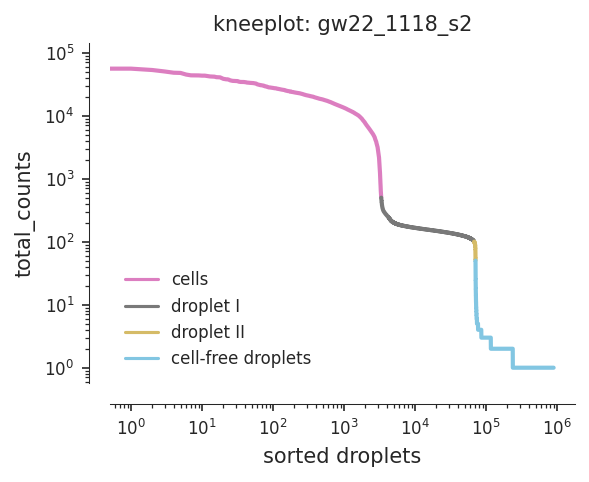

In [230]:
plt.figure(figsize=(4, 3), dpi=150)

ax = sns.lineplot(data = rank_UMIs,
                  x='rank',
                  y='total_counts',
                  hue='droplets',
                  hue_order=['cells', 'droplet I', 'droplet II', 'cell-free droplets'],
                  palette=sns.color_palette()[-4:],
                  markers=False,
                  lw=2)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('sorted droplets');
ax.legend(loc='lower left', ncol=1, title=None, frameon=False)
ax.set_title(f'kneeplot: gw22_1118_s2');

sns.set_palette("muted")
sns.set_style("ticks")
sns.despine(offset=10, trim=False);

In [231]:
####################
gw22_1118_s2_filtered = gw22_1118_s2[gw22_1118_s2.obs_names.isin(rank_UMIs[rank_UMIs['droplets']=='cells'].index)] # equal to filtered population as cellranger output
gw22_1118_s2_sticr_filtered = gw22_1118_s2_sticr[gw22_1118_s2_sticr.obs_names.isin(gw22_1118_s2_filtered.obs_names)].to_df() # pandas.DataFrame
gw22_1118_s2_sticr_filtered_empty_droplets = gw22_1118_s2_sticr_raw.loc[gw22_1118_s2_sticr_raw.index.difference(gw22_1118_s2_sticr_filtered.index)]
gw22_1118_s2_sticr_filtered_empty_profile = gw22_1118_s2_sticr_filtered_empty_droplets.sum()/gw22_1118_s2_sticr_filtered_empty_droplets.sum().sum()    # pandas.Series
scarObj = scAR.model(raw_count=gw22_1118_s2_sticr_filtered,
                     empty_profile=gw22_1118_s2_sticr_filtered_empty_profile.values, # In the case of default None, the empty_profile will be calculated by averaging pooled cells
                     scRNAseq_tech='CROPseq')
scarObj.train(epochs=400)
scarObj.inference(feature_type='sgRNAs', cutoff=3)
scarObj.feature_assignment.to_csv(out)
####################

..Running VAE using the following param set:
......scAR mode:  CROPseq
......count model:  binomial
......num_input_feature:  18884
......NN_layer1:  150
......NN_layer2:  100
......latent_space:  15
......dropout_prob:  0
......kld_weight:  1e-05
......lr:  0.001
......lr_step_size:  5
......lr_gamma:  0.97
  Training.....
100%|██████████| 400/400 [17:29<00:00,  2.62s/it]
  Inferring .....


In [232]:
scarObj.feature_assignment.to_csv(out)

In [233]:
bc_csv = pd.read_csv(out)

In [234]:
bc_csv

,Unnamed: 0,sgRNAs,n_sgRNAs
0,AAACCCAGTATTAAGG,IndexE_Bit1_F_321-Bit2_F_305-Bit3_F_465t,1
1,AAACCCATCCTTGGAA,IndexE_Bit1_F_397-Bit2_F_273-Bit3_F_307t,1
2,AAACGAAAGATTCGCT,Index3_Bit1_F_140-Bit2_F_129-Bit3_F_305t,1
3,AAACGAACAACCGCCA,IndexE_Bit1_F_203-Bit2_F_259-Bit3_F_430t,1
4,AAACGAACAGCGACAA,IndexE_Bit1_F_191-Bit2_F_314-Bit3_F_485t,1
...,...,...,...
3251,TTTGTTGCAAGAGATT,IndexE_Bit1_F_204-Bit2_F_125-Bit3_F_205t,1
3252,TTTGTTGCAGTTGAAA,Index3_Bit1_F_097-Bit2_F_228-Bit3_F_485t,1
3253,TTTGTTGCATGATCTG,IndexE_Bit1_F_047-Bit2_F_180-Bit3_F_025t,1
3254,TTTGTTGGTAGGAGGG,Index3_Bit1_F_027-Bit2_F_037-Bit3_F_199t,1


In [235]:
len(np.unique(bc_csv['sgRNAs']))

2187

In [236]:
bc_csv['n_sgRNAs'].value_counts()

1    3235
2      19
6       1
3       1
Name: n_sgRNAs, dtype: int64

In [237]:
sticr_tsv['UMI_Count'].value_counts()

1      326258
2       17848
3        4701
4        2220
5        1386
        ...  
127         1
214         1
178         1
589         1
107         1
Name: UMI_Count, Length: 142, dtype: int64

In [283]:
bc_csv = pd.read_csv('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW22_221118/GW22_221118_S2_scAR_bcs.csv')

In [285]:
for n in np.unique(bc_csv.n_sgRNAs):
    print('Number of barcodes in clone: ',str(n))
    print('Total number of cells with given barcodes:')
    print(sum(bc_csv.n_sgRNAs==n))
    print('Unique number of barcodes:')
    print(len(np.unique(bc_csv.loc[bc_csv.n_sgRNAs==n,:].sgRNAs)))
    print('')

Number of barcodes in clone:  1
Total number of cells with given barcodes:
3235
Unique number of barcodes:
2166

Number of barcodes in clone:  2
Total number of cells with given barcodes:
19
Unique number of barcodes:
19

Number of barcodes in clone:  3
Total number of cells with given barcodes:
1
Unique number of barcodes:
1

Number of barcodes in clone:  6
Total number of cells with given barcodes:
1
Unique number of barcodes:
1



In [286]:
bc_csv.columns=['CBC','Clone_barcodes','n_barcodes']

In [287]:
clone_data_df = pd.DataFrame(bc_csv.Clone_barcodes.value_counts())

In [288]:
clone_ids = []
exp_prefix='LS28'
for i in range(0,len(clone_data_df)):
    clone_ids.append(exp_prefix+'_Clone_'+str(i))

In [289]:
clone_data_df['Clone_IDs']=clone_ids

In [290]:
clone_data_df.columns=['Clone_size','Clone_IDs']

In [291]:
clone_index = []
for i in range(0,len(clone_data_df)):
    clone_index.append(clone_data_df.index[i][0:6])

In [292]:
clone_data_df['Clone_Index']=clone_index

In [293]:
clone_data_df

,Clone_size,Clone_IDs,Clone_Index
IndexE_Bit1_F_292-Bit2_F_140-Bit3_F_063t,11,LS28_Clone_0,IndexE
IndexE_Bit1_F_384-Bit2_F_045-Bit3_F_213t,10,LS28_Clone_1,IndexE
IndexE_Bit1_F_086-Bit2_F_136-Bit3_F_156t,9,LS28_Clone_2,IndexE
IndexE_Bit1_F_250-Bit2_F_099-Bit3_F_370t,9,LS28_Clone_3,IndexE
Index3_Bit1_F_066-Bit2_F_327-Bit3_F_244t,9,LS28_Clone_4,Index3
...,...,...,...
Index3_Bit1_F_474-Bit2_F_253-Bit3_F_279t,1,LS28_Clone_2182,Index3
IndexE_Bit1_F_134-Bit2_F_152-Bit3_F_203t,1,LS28_Clone_2183,IndexE
Index3_Bit1_F_398-Bit2_F_060-Bit3_F_099t,1,LS28_Clone_2184,Index3
Index3_Bit1_F_426-Bit2_F_344-Bit3_F_281t,1,LS28_Clone_2185,Index3


In [294]:
clone_data_df['Clone_size'].value_counts()

1     1571
2      383
3      131
4       45
5       30
6       10
7        8
8        4
9        3
11       1
10       1
Name: Clone_size, dtype: int64

In [295]:
bc_csv = bc_csv.merge(clone_data_df, left_on='Clone_barcodes', right_index=True)

In [296]:
bc_csv.to_csv('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW22_221118/GW22_221118_S2_bcs_final_metadata.csv')

## new processing for 221118 S3:

In [240]:
sticr_tsv = pd.read_csv('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW22_221118/GW22_221118_S3/Final_Barcodes.tsv',
                           sep='\t')
sticr_tsv.index = list(sticr_tsv['CBC'])

In [241]:
cbc_names = np.unique(sticr_tsv['CBC'])
bc_names = np.unique(sticr_tsv['barcode'])
bc_matrix = np.zeros((len(np.unique(cbc_names)), len(np.unique(bc_names))))
bc_df = pd.DataFrame(bc_matrix, index=list(cbc_names), columns=list(bc_names))

In [242]:
from tqdm import tqdm

for sbc in tqdm(bc_names):
    bc_df.loc[bc_df.index.isin(sticr_tsv['CBC'][sticr_tsv['barcode']==sbc]), bc_df.columns==sbc] = sticr_tsv.loc[sticr_tsv['barcode']==sbc,'UMI_Count']

100%|██████████| 21115/21115 [10:52<00:00, 32.38it/s]


In [243]:
from scipy.sparse import csr_matrix
import h5sparse
import h5py
import anndata
bc_df_sparse = csr_matrix(bc_df)

In [244]:
bc_df_reformat = pd.DataFrame.sparse.from_spmatrix(bc_df_sparse, index=bc_df.index, columns=bc_df.columns)
bc_df_sc_input = anndata.AnnData(bc_df_reformat)
bc_df_sc_input.write_h5ad('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW22_221118/GW22_221118_S3_bc_matrix_sparse.h5ad')

In [245]:
rna = '/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/cellranger_outs/GW22_221118_sub_FBS_S3_cellranger/raw_feature_bc_matrix.h5'
sticr = '/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW22_221118/GW22_221118_S3_bc_matrix_sparse.h5ad'
out = '/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW22_221118/GW22_221118_S3_scAR_bcs.csv'
gw22_1118_S3 = sc.read_10x_h5(filename=rna, gex_only=True) # Change this if ur using a different scRNA-seq format
gw22_1118_S3_sticr = sc.read_h5ad(sticr)
gw22_1118_S3_sticr_raw = gw22_1118_S3_sticr.to_df()
gw22_1118_S3_sticr.var_names_make_unique()

In [246]:
#have to fix the names in the RNA file to remove the -1 from the CBC
fixed_rna_names = gw22_1118_S3.obs_names.tolist()
for c in range(0, len(fixed_rna_names)):
    fixed_rna_names[c] = fixed_rna_names[c][0:-2]
print(fixed_rna_names[0:10])
print(gw22_1118_S3.obs_names[0:10].tolist())

['AAACCCAAGAAACCCA', 'AAACCCAAGAAACTGT', 'AAACCCAAGAAAGTCT', 'AAACCCAAGAAATAGG', 'AAACCCAAGAAATTCG', 'AAACCCAAGAAATTGC', 'AAACCCAAGAACCGCA', 'AAACCCAAGAACCTCC', 'AAACCCAAGAACGCGT', 'AAACCCAAGAAGCTCG']
['AAACCCAAGAAACCCA-1', 'AAACCCAAGAAACTGT-1', 'AAACCCAAGAAAGTCT-1', 'AAACCCAAGAAATAGG-1', 'AAACCCAAGAAATTCG-1', 'AAACCCAAGAAATTGC-1', 'AAACCCAAGAACCGCA-1', 'AAACCCAAGAACCTCC-1', 'AAACCCAAGAACGCGT-1', 'AAACCCAAGAAGCTCG-1']


In [247]:
gw22_1118_S3.obs_names = fixed_rna_names
print(gw22_1118_S3.obs_names[:10].tolist())
print(gw22_1118_S3_sticr.obs_names[:10].tolist())

['AAACCCAAGAAACCCA', 'AAACCCAAGAAACTGT', 'AAACCCAAGAAAGTCT', 'AAACCCAAGAAATAGG', 'AAACCCAAGAAATTCG', 'AAACCCAAGAAATTGC', 'AAACCCAAGAACCGCA', 'AAACCCAAGAACCTCC', 'AAACCCAAGAACGCGT', 'AAACCCAAGAAGCTCG']
['AAACCCAAGACGGTTG', 'AAACCCAAGATCGCCC', 'AAACCCAAGATGACAT', 'AAACCCAAGATGGTAT', 'AAACCCAAGCATAGGC', 'AAACCCAAGCGCCTTG', 'AAACCCAAGGTTCTAC', 'AAACCCAAGTATCTGC', 'AAACCCAAGTCTAGCT', 'AAACCCAAGTTCCGTA']


In [248]:
rank_UMIs = pd.DataFrame(gw22_1118_S3[:,gw22_1118_S3.var['feature_types']=='Gene Expression'].X.sum(axis=1), index = gw22_1118_S3.obs_names, columns=['total_counts'])
rank_UMIs['droplets'] = 'cell-free droplets'
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>50, 'droplet II')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>100, 'droplet I')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>500, 'cells')
rank_UMIs = rank_UMIs.sort_values(by='total_counts', ascending=False).reset_index().rename_axis("rank").reset_index()
rank_UMIs = rank_UMIs.loc[rank_UMIs['total_counts']>0]
rank_UMIs = rank_UMIs.set_index('index').rename_axis('cells')

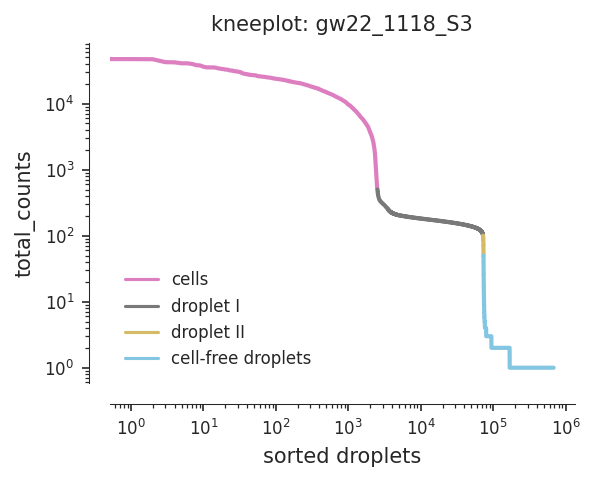

In [249]:
plt.figure(figsize=(4, 3), dpi=150)

ax = sns.lineplot(data = rank_UMIs,
                  x='rank',
                  y='total_counts',
                  hue='droplets',
                  hue_order=['cells', 'droplet I', 'droplet II', 'cell-free droplets'],
                  palette=sns.color_palette()[-4:],
                  markers=False,
                  lw=2)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('sorted droplets');
ax.legend(loc='lower left', ncol=1, title=None, frameon=False)
ax.set_title(f'kneeplot: gw22_1118_S3');

sns.set_palette("muted")
sns.set_style("ticks")
sns.despine(offset=10, trim=False);

In [250]:
####################
gw22_1118_S3_filtered = gw22_1118_S3[gw22_1118_S3.obs_names.isin(rank_UMIs[rank_UMIs['droplets']=='cells'].index)] # equal to filtered population as cellranger output
gw22_1118_S3_sticr_filtered = gw22_1118_S3_sticr[gw22_1118_S3_sticr.obs_names.isin(gw22_1118_S3_filtered.obs_names)].to_df() # pandas.DataFrame
gw22_1118_S3_sticr_filtered_empty_droplets = gw22_1118_S3_sticr_raw.loc[gw22_1118_S3_sticr_raw.index.difference(gw22_1118_S3_sticr_filtered.index)]
gw22_1118_S3_sticr_filtered_empty_profile = gw22_1118_S3_sticr_filtered_empty_droplets.sum()/gw22_1118_S3_sticr_filtered_empty_droplets.sum().sum()    # pandas.Series
scarObj = scAR.model(raw_count=gw22_1118_S3_sticr_filtered,
                     empty_profile=gw22_1118_S3_sticr_filtered_empty_profile.values, # In the case of default None, the empty_profile will be calculated by averaging pooled cells
                     scRNAseq_tech='CROPseq')
scarObj.train(epochs=400)
scarObj.inference(feature_type='sgRNAs', cutoff=3)
scarObj.feature_assignment.to_csv(out)
####################

..Running VAE using the following param set:
......scAR mode:  CROPseq
......count model:  binomial
......num_input_feature:  21115
......NN_layer1:  150
......NN_layer2:  100
......latent_space:  15
......dropout_prob:  0
......kld_weight:  1e-05
......lr:  0.001
......lr_step_size:  5
......lr_gamma:  0.97
  Training.....
100%|██████████| 400/400 [13:56<00:00,  2.09s/it]
  Inferring .....


In [251]:
scarObj.feature_assignment.to_csv(out)

In [252]:
bc_csv = pd.read_csv(out)

In [253]:
bc_csv

,Unnamed: 0,sgRNAs,n_sgRNAs
0,AAACCCAGTGCTCTTC,Index3_Bit1_F_171-Bit2_F_277-Bit3_F_364t,1
1,AAACCCATCGTTATCT,IndexE_Bit1_F_150-Bit2_F_347-Bit3_F_272t,1
2,AAACGAACAAGTGGTG,IndexE_Bit1_F_057-Bit2_F_427-Bit3_F_139t,1
3,AAACGAATCCTTTAGT,IndexE_Bit1_F_085-Bit2_F_218-Bit3_F_433t,1
4,AAACGCTAGAAATCCA,IndexE_Bit1_F_323-Bit2_F_375-Bit3_F_098t,1
...,...,...,...
2404,TTTGGTTTCAGCTGAT,IndexE_Bit1_F_056-Bit2_F_263-Bit3_F_344t,1
2405,TTTGGTTTCCACAGCG,Index3_Bit1_F_122-Bit2_F_103-Bit3_F_156t,1
2406,TTTGTTGAGGCTTAAA,Index3_Bit1_F_218-Bit2_F_338-Bit3_F_051t,1
2407,TTTGTTGAGTCAGAGC,IndexE_Bit1_F_083-Bit2_F_125-Bit3_F_391t,1


In [254]:
len(np.unique(bc_csv['sgRNAs']))

1626

In [255]:
bc_csv['n_sgRNAs'].value_counts()

1    2393
2      16
Name: n_sgRNAs, dtype: int64

In [256]:
sticr_tsv['UMI_Count'].value_counts()

1      209704
2       11007
3        3904
4        2136
5        1389
        ...  
118         1
149         1
141         1
170         1
169         1
Name: UMI_Count, Length: 136, dtype: int64

In [257]:
for n in np.unique(bc_csv.n_sgRNAs):
    print('Number of barcodes in clone: ',str(n))
    print('Total number of cells with given barcodes:')
    print(sum(bc_csv.n_sgRNAs==n))
    print('Unique number of barcodes:')
    print(len(np.unique(bc_csv.loc[bc_csv.n_sgRNAs==n,:].sgRNAs)))
    print('')

Number of barcodes in clone:  1
Total number of cells with given barcodes:
2393
Unique number of barcodes:
1610

Number of barcodes in clone:  2
Total number of cells with given barcodes:
16
Unique number of barcodes:
16



In [258]:
bc_csv.columns=['CBC','Clone_barcodes','n_barcodes']

In [259]:
clone_data_df = pd.DataFrame(bc_csv.Clone_barcodes.value_counts())

In [260]:
clone_ids = []
exp_prefix='LS29'
for i in range(0,len(clone_data_df)):
    clone_ids.append(exp_prefix+'_Clone_'+str(i))

In [261]:
clone_data_df['Clone_IDs']=clone_ids

In [262]:
clone_data_df.columns=['Clone_size','Clone_IDs']

In [263]:
clone_index = []
for i in range(0,len(clone_data_df)):
    clone_index.append(clone_data_df.index[i][0:6])

In [264]:
clone_data_df['Clone_Index']=clone_index

In [265]:
clone_data_df

,Clone_size,Clone_IDs,Clone_Index
Index3_Bit1_F_075-Bit2_F_262-Bit3_F_244t,10,LS29_Clone_0,Index3
Index3_Bit1_F_196-Bit2_F_150-Bit3_F_097t,8,LS29_Clone_1,Index3
Index3_Bit1_F_222-Bit2_F_367-Bit3_F_080t,8,LS29_Clone_2,Index3
IndexE_Bit1_F_049-Bit2_F_148-Bit3_F_314t,8,LS29_Clone_3,IndexE
Index3_Bit1_F_495-Bit2_F_168-Bit3_F_237t,8,LS29_Clone_4,Index3
...,...,...,...
Index3_Bit1_F_366-Bit2_F_096-Bit3_F_111t,1,LS29_Clone_1621,Index3
IndexE_Bit1_F_050-Bit2_F_292-Bit3_F_028t,1,LS29_Clone_1622,IndexE
IndexE_Bit1_F_383-Bit2_F_001-Bit3_F_249t,1,LS29_Clone_1623,IndexE
Index3_Bit1_F_067-Bit2_F_427-Bit3_F_105t,1,LS29_Clone_1624,Index3


In [267]:
clone_data_df['Clone_size'].value_counts()

1     1167
2      282
3      108
4       29
5       19
6       11
7        5
8        4
10       1
Name: Clone_size, dtype: int64

In [268]:
bc_csv = bc_csv.merge(clone_data_df, left_on='Clone_barcodes', right_index=True)

In [269]:
bc_csv.to_csv('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW22_221118/GW22_221118_S3_bcs_final_metadata.csv')

## new processing for 221220 S1:

In [310]:
## load in the Final_Barcodes.tsv output from the STICR pipeline
sticr_tsv = pd.read_csv('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW16_1220/GW16_1220_S1/Final_Barcodes.tsv',
                           sep='\t')
sticr_tsv.index = list(sticr_tsv['CBC'])

In [311]:
## generate a matrix of zeroes with dimensions CBCs (rows) by STICR BCs (columns)
cbc_names = np.unique(sticr_tsv['CBC'])
bc_names = np.unique(sticr_tsv['barcode'])
bc_matrix = np.zeros((len(np.unique(cbc_names)), len(np.unique(bc_names))))
bc_df = pd.DataFrame(bc_matrix, index=list(cbc_names), columns=list(bc_names))

In [312]:
## iterate through every STICR BC and pull the UMI values for a given CBC and map them into the matrix of cells by barcodes
from tqdm import tqdm

for sbc in tqdm(bc_names):
    bc_df.loc[bc_df.index.isin(sticr_tsv['CBC'][sticr_tsv['barcode']==sbc]), bc_df.columns==sbc] = sticr_tsv.loc[sticr_tsv['barcode']==sbc,'UMI_Count']

100%|██████████| 31284/31284 [1:14:23<00:00,  7.01it/s]


In [313]:
## compress the dataframe by turning it into a sparse matrix, which is the input for scanpy
## note: this used to be done in R with DropletUtils, but that stopped working for some reason so doing it this way instead
from scipy.sparse import csr_matrix
import h5sparse
import h5py
import anndata
bc_df_sparse = csr_matrix(bc_df)

In [314]:
## convert the sparse matrix back into a dataframe, then parse it with AnnData for scanpy input
## save the scanpy input in h5 format so that the slow matrix generation doesn't have to be done again
bc_df_reformat = pd.DataFrame.sparse.from_spmatrix(bc_df_sparse, index=bc_df.index, columns=bc_df.columns)
bc_df_sc_input = anndata.AnnData(bc_df_reformat)
bc_df_sc_input.write_h5ad('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW16_1220/GW16_221220_S1_bc_matrix_sparse.h5ad')

In [315]:
## load in the cellranger output and barcode matrix
rna = '/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/cellranger_outs/GW16_1220_sub_FBS_S1_cellranger/raw_feature_bc_matrix.h5'
sticr = '/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW16_1220/GW16_221220_S1_bc_matrix_sparse.h5ad'
out = '/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW16_1220/GW16_221220_S1_scAR_bcs.csv'
gw16_1220_s1 = sc.read_10x_h5(filename=rna, gex_only=True) # Change this if ur using a different scRNA-seq format
gw16_1220_s1_sticr = sc.read_h5ad(sticr)
gw16_1220_s1_sticr_raw = gw16_1220_s1_sticr.to_df()
gw16_1220_s1_sticr.var_names_make_unique()

In [316]:
## fix the names in the RNA file to remove the -1 from the CBC
fixed_rna_names = gw16_1220_s1.obs_names.tolist()
for c in range(0, len(fixed_rna_names)):
    fixed_rna_names[c] = fixed_rna_names[c][0:-2]
print('old names:')
print(gw16_1220_s1.obs_names[0:10].tolist())
print('fixed names:')
print(fixed_rna_names[0:10])
gw16_1220_s1.obs_names = fixed_rna_names
print('cell names from cellranger:')
print(gw16_1220_s1.obs_names[:10].tolist())
print('cell names from STICR processing:')
print(gw16_1220_s1_sticr.obs_names[:10].tolist())

old names:
['AAACCCAAGAAACCCA-1', 'AAACCCAAGAAACGTC-1', 'AAACCCAAGAAACTCA-1', 'AAACCCAAGAAAGAAC-1', 'AAACCCAAGAAAGGAT-1', 'AAACCCAAGAAAGTCT-1', 'AAACCCAAGAAATGGG-1', 'AAACCCAAGAAATTCG-1', 'AAACCCAAGAACAAGG-1', 'AAACCCAAGAACCGCA-1']
fixed names:
['AAACCCAAGAAACCCA', 'AAACCCAAGAAACGTC', 'AAACCCAAGAAACTCA', 'AAACCCAAGAAAGAAC', 'AAACCCAAGAAAGGAT', 'AAACCCAAGAAAGTCT', 'AAACCCAAGAAATGGG', 'AAACCCAAGAAATTCG', 'AAACCCAAGAACAAGG', 'AAACCCAAGAACCGCA']
cell names from cellranger:
['AAACCCAAGAAACCCA', 'AAACCCAAGAAACGTC', 'AAACCCAAGAAACTCA', 'AAACCCAAGAAAGAAC', 'AAACCCAAGAAAGGAT', 'AAACCCAAGAAAGTCT', 'AAACCCAAGAAATGGG', 'AAACCCAAGAAATTCG', 'AAACCCAAGAACAAGG', 'AAACCCAAGAACCGCA']
cell names from STICR processing:
['AAACCCAAGAAACTGC', 'AAACCCAAGAGTCACG', 'AAACCCAAGATACATG', 'AAACCCAAGATTACTC', 'AAACCCAAGATTTGTC', 'AAACCCAAGCATCTGC', 'AAACCCAAGCATTTGC', 'AAACCCAAGCGACATA', 'AAACCCAAGCGCTGCT', 'AAACCCAAGCGGTAAC']


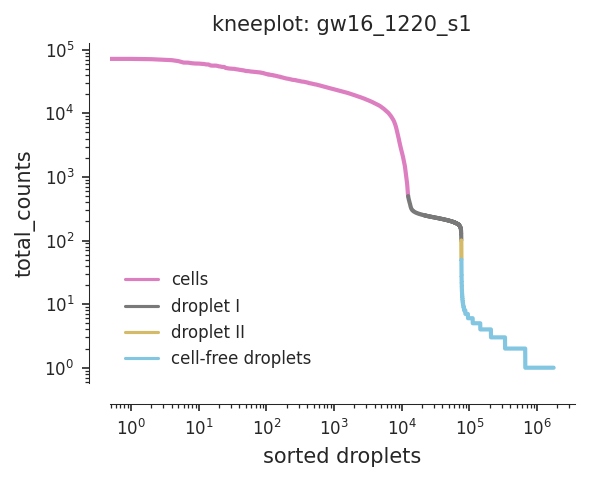

In [317]:
## run scAR (stole this code from Chang)
rank_UMIs = pd.DataFrame(gw16_1220_s1[:,gw16_1220_s1.var['feature_types']=='Gene Expression'].X.sum(axis=1), index = gw16_1220_s1.obs_names, columns=['total_counts'])
rank_UMIs['droplets'] = 'cell-free droplets'
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>50, 'droplet II')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>100, 'droplet I')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>500, 'cells')
rank_UMIs = rank_UMIs.sort_values(by='total_counts', ascending=False).reset_index().rename_axis("rank").reset_index()
rank_UMIs = rank_UMIs.loc[rank_UMIs['total_counts']>0]
rank_UMIs = rank_UMIs.set_index('index').rename_axis('cells')


plt.figure(figsize=(4, 3), dpi=150)

ax = sns.lineplot(data = rank_UMIs,
                  x='rank',
                  y='total_counts',
                  hue='droplets',
                  hue_order=['cells', 'droplet I', 'droplet II', 'cell-free droplets'],
                  palette=sns.color_palette()[-4:],
                  markers=False,
                  lw=2)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('sorted droplets');
ax.legend(loc='lower left', ncol=1, title=None, frameon=False)
ax.set_title(f'kneeplot: gw16_1220_s1');

sns.set_palette("muted")
sns.set_style("ticks")
sns.despine(offset=10, trim=False);

In [318]:
## run scAR (stole this code from Chang)
####################
gw16_1220_s1_filtered = gw16_1220_s1[gw16_1220_s1.obs_names.isin(rank_UMIs[rank_UMIs['droplets']=='cells'].index)] # equal to filtered population as cellranger output
gw16_1220_s1_sticr_filtered = gw16_1220_s1_sticr[gw16_1220_s1_sticr.obs_names.isin(gw16_1220_s1_filtered.obs_names)].to_df() # pandas.DataFrame
gw16_1220_s1_sticr_filtered_empty_droplets = gw16_1220_s1_sticr_raw.loc[gw16_1220_s1_sticr_raw.index.difference(gw16_1220_s1_sticr_filtered.index)]
gw16_1220_s1_sticr_filtered_empty_profile = gw16_1220_s1_sticr_filtered_empty_droplets.sum()/gw16_1220_s1_sticr_filtered_empty_droplets.sum().sum()    # pandas.Series
scarObj = scAR.model(raw_count=gw16_1220_s1_sticr_filtered,
                     empty_profile=gw16_1220_s1_sticr_filtered_empty_profile.values, # In the case of default None, the empty_profile will be calculated by averaging pooled cells
                     scRNAseq_tech='CROPseq')
scarObj.train(epochs=400)
scarObj.inference(feature_type='sgRNAs', cutoff=3)
scarObj.feature_assignment.to_csv(out)
####################

..Running VAE using the following param set:
......scAR mode:  CROPseq
......count model:  binomial
......num_input_feature:  31284
......NN_layer1:  150
......NN_layer2:  100
......latent_space:  15
......dropout_prob:  0
......kld_weight:  1e-05
......lr:  0.001
......lr_step_size:  5
......lr_gamma:  0.97
  Training.....
100%|██████████| 400/400 [1:42:15<00:00, 15.34s/it]
  Inferring .....


In [319]:
## write the final scAR output to a csv
scarObj.feature_assignment.to_csv(out)

In [320]:
## read the final scAR output back in for further validations/manipulations
bc_csv = pd.read_csv(out)
bc_csv

,Unnamed: 0,sgRNAs,n_sgRNAs
0,AAACCCAAGGTTCTAC,IndexE_Bit1_F_360-Bit2_F_303-Bit3_F_332t,1
1,AAACCCAAGTATCTGC,IndexE_Bit1_F_482-Bit2_F_318-Bit3_F_069t,1
2,AAACCCACAAGAGGTC,Index3_Bit1_F_330-Bit2_F_114-Bit3_F_189t,1
3,AAACCCACACATACTG,Index3_Bit1_F_219-Bit2_F_461-Bit3_F_298t,1
4,AAACCCACACCTGCAG,Index3_Bit1_F_184-Bit2_F_078-Bit3_F_099t,1
...,...,...,...
11648,TTTGTTGGTGTCCGGT,Index3_Bit1_F_140-Bit2_F_276-Bit3_F_184t,1
11649,TTTGTTGTCAACGTGT,IndexE_Bit1_F_289-Bit2_F_267-Bit3_F_328t,1
11650,TTTGTTGTCAATGCAC,IndexE_Bit1_F_424-Bit2_F_285-Bit3_F_425t,1
11651,TTTGTTGTCAGCTCTC,IndexE_Bit1_F_126-Bit2_F_224-Bit3_F_436t,1


In [321]:
print('n STICR BCs:')
print(len(np.unique(bc_csv['sgRNAs'])))

n STICR BCs:
7990


In [322]:
bc_csv['n_sgRNAs'].value_counts()

1    11495
2      147
3        9
4        2
Name: n_sgRNAs, dtype: int64

In [323]:
sticr_tsv['UMI_Count'].value_counts()

1      1076591
2        47521
3         8294
4         3097
5         1684
        ...   
167          1
280          1
135          1
182          1
157          1
Name: UMI_Count, Length: 234, dtype: int64

In [324]:
for n in np.unique(bc_csv.n_sgRNAs):
    print('Number of barcodes in clone: ',str(n))
    print('Total number of cells with given barcodes:')
    print(sum(bc_csv.n_sgRNAs==n))
    print('Unique number of barcodes:')
    print(len(np.unique(bc_csv.loc[bc_csv.n_sgRNAs==n,:].sgRNAs)))
    print('')

Number of barcodes in clone:  1
Total number of cells with given barcodes:
11495
Unique number of barcodes:
7832

Number of barcodes in clone:  2
Total number of cells with given barcodes:
147
Unique number of barcodes:
147

Number of barcodes in clone:  3
Total number of cells with given barcodes:
9
Unique number of barcodes:
9

Number of barcodes in clone:  4
Total number of cells with given barcodes:
2
Unique number of barcodes:
2



In [325]:
bc_csv.columns=['CBC','Clone_barcodes','n_barcodes']
clone_data_df = pd.DataFrame(bc_csv.Clone_barcodes.value_counts())

In [326]:
clone_ids = []
exp_prefix='LS30'
for i in range(0,len(clone_data_df)):
    clone_ids.append(exp_prefix+'_Clone_'+str(i))

In [327]:
clone_data_df['Clone_IDs']=clone_ids

In [328]:
clone_data_df.columns=['Clone_size','Clone_IDs']

In [329]:
clone_index = []
for i in range(0,len(clone_data_df)):
    clone_index.append(clone_data_df.index[i][0:6])

In [330]:
clone_data_df['Clone_Index']=clone_index

In [331]:
clone_data_df

,Clone_size,Clone_IDs,Clone_Index
Index3_Bit1_F_245-Bit2_F_146-Bit3_F_137t,13,LS30_Clone_0,Index3
IndexE_Bit1_F_048-Bit2_F_069-Bit3_F_183t,12,LS30_Clone_1,IndexE
IndexE_Bit1_F_291-Bit2_F_076-Bit3_F_123t,11,LS30_Clone_2,IndexE
IndexE_Bit1_F_031-Bit2_F_016-Bit3_F_461t,11,LS30_Clone_3,IndexE
IndexE_Bit1_F_187-Bit2_F_038-Bit3_F_190t,10,LS30_Clone_4,IndexE
...,...,...,...
IndexE_Bit1_F_244-Bit2_F_315-Bit3_F_231t,1,LS30_Clone_7985,IndexE
Index3_Bit1_F_170-Bit2_F_171-Bit3_F_489t,1,LS30_Clone_7986,Index3
Index3_Bit1_F_294-Bit2_F_476-Bit3_F_341t,1,LS30_Clone_7987,Index3
IndexE_Bit1_F_330-Bit2_F_114-Bit3_F_337t,1,LS30_Clone_7988,IndexE


In [332]:
clone_data_df['Clone_size'].value_counts()

1     5646
2     1608
3      447
4      147
5       62
6       44
7       19
8       10
11       2
9        2
13       1
12       1
10       1
Name: Clone_size, dtype: int64

In [333]:
bc_csv = bc_csv.merge(clone_data_df, left_on='Clone_barcodes', right_index=True)

In [334]:
bc_csv.to_csv('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW16_1220/GW16_221220_S1_bcs_final_metadata.csv')

## new processing for 221220 S2:

In [335]:
## load in the Final_Barcodes.tsv output from the STICR pipeline
sticr_tsv = pd.read_csv('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW16_1220/GW16_1220_S2/Final_Barcodes.tsv',
                           sep='\t')
sticr_tsv.index = list(sticr_tsv['CBC'])

In [336]:
## generate a matrix of zeroes with dimensions CBCs (rows) by STICR BCs (columns)
cbc_names = np.unique(sticr_tsv['CBC'])
bc_names = np.unique(sticr_tsv['barcode'])
bc_matrix = np.zeros((len(np.unique(cbc_names)), len(np.unique(bc_names))))
bc_df = pd.DataFrame(bc_matrix, index=list(cbc_names), columns=list(bc_names))

In [337]:
## iterate through every STICR BC and pull the UMI values for a given CBC and map them into the matrix of cells by barcodes
from tqdm import tqdm

for sbc in tqdm(bc_names):
    bc_df.loc[bc_df.index.isin(sticr_tsv['CBC'][sticr_tsv['barcode']==sbc]), bc_df.columns==sbc] = sticr_tsv.loc[sticr_tsv['barcode']==sbc,'UMI_Count']

100%|██████████| 17517/17517 [10:45<00:00, 27.12it/s]


In [338]:
## compress the dataframe by turning it into a sparse matrix, which is the input for scanpy
## note: this used to be done in R with DropletUtils, but that stopped working for some reason so doing it this way instead
from scipy.sparse import csr_matrix
import h5sparse
import h5py
import anndata
bc_df_sparse = csr_matrix(bc_df)

In [339]:
## convert the sparse matrix back into a dataframe, then parse it with AnnData for scanpy input
## save the scanpy input in h5 format so that the slow matrix generation doesn't have to be done again
bc_df_reformat = pd.DataFrame.sparse.from_spmatrix(bc_df_sparse, index=bc_df.index, columns=bc_df.columns)
bc_df_sc_input = anndata.AnnData(bc_df_reformat)
bc_df_sc_input.write_h5ad('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW16_1220/GW16_221220_S2_bc_matrix_sparse.h5ad')

In [340]:
## load in the cellranger output and barcode matrix
rna = '/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/cellranger_outs/GW16_1220_sub_FBS_S2_cellranger/raw_feature_bc_matrix.h5'
sticr = '/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW16_1220/GW16_221220_S2_bc_matrix_sparse.h5ad'
out = '/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW16_1220/GW16_221220_S2_scAR_bcs.csv'
gw16_1220_s2 = sc.read_10x_h5(filename=rna, gex_only=True) # Change this if ur using a different scRNA-seq format
gw16_1220_s2_sticr = sc.read_h5ad(sticr)
gw16_1220_s2_sticr_raw = gw16_1220_s2_sticr.to_df()
gw16_1220_s2_sticr.var_names_make_unique()

In [341]:
## fix the names in the RNA file to remove the -1 from the CBC
fixed_rna_names = gw16_1220_s2.obs_names.tolist()
for c in range(0, len(fixed_rna_names)):
    fixed_rna_names[c] = fixed_rna_names[c][0:-2]
print('old names:')
print(gw16_1220_s2.obs_names[0:10].tolist())
print('fixed names:')
print(fixed_rna_names[0:10])
gw16_1220_s2.obs_names = fixed_rna_names
print('cell names from cellranger:')
print(gw16_1220_s2.obs_names[:10].tolist())
print('cell names from STICR processing:')
print(gw16_1220_s2_sticr.obs_names[:10].tolist())

old names:
['AAACCCAAGAAACCAT-1', 'AAACCCAAGAAACCCA-1', 'AAACCCAAGAAACCCG-1', 'AAACCCAAGAAACGAA-1', 'AAACCCAAGAAACTAC-1', 'AAACCCAAGAAACTCA-1', 'AAACCCAAGAAAGACA-1', 'AAACCCAAGAAATCCA-1', 'AAACCCAAGAACAGGA-1', 'AAACCCAAGAACCCGA-1']
fixed names:
['AAACCCAAGAAACCAT', 'AAACCCAAGAAACCCA', 'AAACCCAAGAAACCCG', 'AAACCCAAGAAACGAA', 'AAACCCAAGAAACTAC', 'AAACCCAAGAAACTCA', 'AAACCCAAGAAAGACA', 'AAACCCAAGAAATCCA', 'AAACCCAAGAACAGGA', 'AAACCCAAGAACCCGA']
cell names from cellranger:
['AAACCCAAGAAACCAT', 'AAACCCAAGAAACCCA', 'AAACCCAAGAAACCCG', 'AAACCCAAGAAACGAA', 'AAACCCAAGAAACTAC', 'AAACCCAAGAAACTCA', 'AAACCCAAGAAAGACA', 'AAACCCAAGAAATCCA', 'AAACCCAAGAACAGGA', 'AAACCCAAGAACCCGA']
cell names from STICR processing:
['AAACCCAAGAATTTGG', 'AAACCCAAGAGACAAG', 'AAACCCAAGATACATG', 'AAACCCAAGATAGCTA', 'AAACCCAAGATAGTCA', 'AAACCCAAGCAACTAG', 'AAACCCAAGCAATTAG', 'AAACCCAAGCCAATAG', 'AAACCCAAGCCACAAG', 'AAACCCAAGCCACTCG']


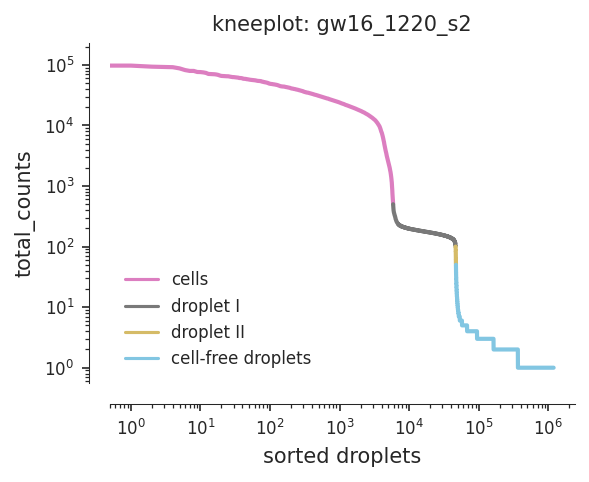

In [342]:
## run scAR (stole this code from Chang)
rank_UMIs = pd.DataFrame(gw16_1220_s2[:,gw16_1220_s2.var['feature_types']=='Gene Expression'].X.sum(axis=1), index = gw16_1220_s2.obs_names, columns=['total_counts'])
rank_UMIs['droplets'] = 'cell-free droplets'
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>50, 'droplet II')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>100, 'droplet I')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>500, 'cells')
rank_UMIs = rank_UMIs.sort_values(by='total_counts', ascending=False).reset_index().rename_axis("rank").reset_index()
rank_UMIs = rank_UMIs.loc[rank_UMIs['total_counts']>0]
rank_UMIs = rank_UMIs.set_index('index').rename_axis('cells')


plt.figure(figsize=(4, 3), dpi=150)

ax = sns.lineplot(data = rank_UMIs,
                  x='rank',
                  y='total_counts',
                  hue='droplets',
                  hue_order=['cells', 'droplet I', 'droplet II', 'cell-free droplets'],
                  palette=sns.color_palette()[-4:],
                  markers=False,
                  lw=2)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('sorted droplets');
ax.legend(loc='lower left', ncol=1, title=None, frameon=False)
ax.set_title(f'kneeplot: gw16_1220_s2');

sns.set_palette("muted")
sns.set_style("ticks")
sns.despine(offset=10, trim=False);

In [343]:
## run scAR (stole this code from Chang)
####################
gw16_1220_s2_filtered = gw16_1220_s2[gw16_1220_s2.obs_names.isin(rank_UMIs[rank_UMIs['droplets']=='cells'].index)] # equal to filtered population as cellranger output
gw16_1220_s2_sticr_filtered = gw16_1220_s2_sticr[gw16_1220_s2_sticr.obs_names.isin(gw16_1220_s2_filtered.obs_names)].to_df() # pandas.DataFrame
gw16_1220_s2_sticr_filtered_empty_droplets = gw16_1220_s2_sticr_raw.loc[gw16_1220_s2_sticr_raw.index.difference(gw16_1220_s2_sticr_filtered.index)]
gw16_1220_s2_sticr_filtered_empty_profile = gw16_1220_s2_sticr_filtered_empty_droplets.sum()/gw16_1220_s2_sticr_filtered_empty_droplets.sum().sum()    # pandas.Series
scarObj = scAR.model(raw_count=gw16_1220_s2_sticr_filtered,
                     empty_profile=gw16_1220_s2_sticr_filtered_empty_profile.values, # In the case of default None, the empty_profile will be calculated by averaging pooled cells
                     scRNAseq_tech='CROPseq')
scarObj.train(epochs=400)
scarObj.inference(feature_type='sgRNAs', cutoff=3)
scarObj.feature_assignment.to_csv(out)
####################

..Running VAE using the following param set:
......scAR mode:  CROPseq
......count model:  binomial
......num_input_feature:  17517
......NN_layer1:  150
......NN_layer2:  100
......latent_space:  15
......dropout_prob:  0
......kld_weight:  1e-05
......lr:  0.001
......lr_step_size:  5
......lr_gamma:  0.97
  Training.....
100%|██████████| 400/400 [28:19<00:00,  4.25s/it]
  Inferring .....


In [344]:
## write the final scAR output to a csv
scarObj.feature_assignment.to_csv(out)

In [345]:
## read the final scAR output back in for further validations/manipulations
bc_csv = pd.read_csv(out)
bc_csv

,Unnamed: 0,sgRNAs,n_sgRNAs
0,AAACCCAAGCCAGTAG,IndexE_Bit1_F_266-Bit2_F_129-Bit3_F_370t,1
1,AAACCCAAGCCTTTCC,IndexE_Bit1_F_139-Bit2_F_059-Bit3_F_018t,1
2,AAACCCAAGGTAGCCA,IndexE_Bit1_F_183-Bit2_F_416-Bit3_F_298t,1
3,AAACCCAGTCTTGCTC,IndexE_Bit1_F_420-Bit2_F_008-Bit3_F_397t,1
4,AAACCCAGTTATTCCT,IndexE_Bit1_F_494-Bit2_F_292-Bit3_F_452t,1
...,...,...,...
5673,TTTGGTTTCTCAGTCC,Index3_Bit1_F_001-Bit2_F_425-Bit3_F_415t,1
5674,TTTGTTGAGAGGTTAT,IndexE_Bit1_F_406-Bit2_F_138-Bit3_F_218t,1
5675,TTTGTTGAGCAGGCTA,IndexE_Bit1_F_114-Bit2_F_051-Bit3_F_210t,1
5676,TTTGTTGCAAATGAAC,Index3_Bit1_F_209-Bit2_F_147-Bit3_F_302t,1


In [346]:
print('n STICR BCs:')
print(len(np.unique(bc_csv['sgRNAs'])))

n STICR BCs:
3728


In [347]:
bc_csv['n_sgRNAs'].value_counts()

1    5595
2      76
3       6
4       1
Name: n_sgRNAs, dtype: int64

In [348]:
sticr_tsv['UMI_Count'].value_counts()

1      254684
2       13943
3        4148
4        1977
5        1173
        ...  
139         1
375         1
180         1
326         1
254         1
Name: UMI_Count, Length: 224, dtype: int64

In [349]:
for n in np.unique(bc_csv.n_sgRNAs):
    print('Number of barcodes in clone: ',str(n))
    print('Total number of cells with given barcodes:')
    print(sum(bc_csv.n_sgRNAs==n))
    print('Unique number of barcodes:')
    print(len(np.unique(bc_csv.loc[bc_csv.n_sgRNAs==n,:].sgRNAs)))
    print('')

Number of barcodes in clone:  1
Total number of cells with given barcodes:
5595
Unique number of barcodes:
3645

Number of barcodes in clone:  2
Total number of cells with given barcodes:
76
Unique number of barcodes:
76

Number of barcodes in clone:  3
Total number of cells with given barcodes:
6
Unique number of barcodes:
6

Number of barcodes in clone:  4
Total number of cells with given barcodes:
1
Unique number of barcodes:
1



In [350]:
bc_csv.columns=['CBC','Clone_barcodes','n_barcodes']
clone_data_df = pd.DataFrame(bc_csv.Clone_barcodes.value_counts())

In [351]:
clone_ids = []
exp_prefix='LS31'
for i in range(0,len(clone_data_df)):
    clone_ids.append(exp_prefix+'_Clone_'+str(i))

In [352]:
clone_data_df['Clone_IDs']=clone_ids

In [353]:
clone_data_df.columns=['Clone_size','Clone_IDs']

In [354]:
clone_index = []
for i in range(0,len(clone_data_df)):
    clone_index.append(clone_data_df.index[i][0:6])

In [355]:
clone_data_df['Clone_Index']=clone_index

In [356]:
clone_data_df

,Clone_size,Clone_IDs,Clone_Index
IndexE_Bit1_F_225-Bit2_F_228-Bit3_F_251t,45,LS31_Clone_0,IndexE
IndexE_Bit1_F_220-Bit2_F_041-Bit3_F_201t,30,LS31_Clone_1,IndexE
IndexE_Bit1_F_357-Bit2_F_351-Bit3_F_492t,18,LS31_Clone_2,IndexE
Index3_Bit1_F_001-Bit2_F_425-Bit3_F_415t,15,LS31_Clone_3,Index3
IndexE_Bit1_F_301-Bit2_F_269-Bit3_F_124t,13,LS31_Clone_4,IndexE
...,...,...,...
IndexE_Bit1_F_155-Bit2_F_207-Bit3_F_068t,1,LS31_Clone_3723,IndexE
IndexE_Bit1_F_112-Bit2_F_110-Bit3_F_159t,1,LS31_Clone_3724,IndexE
IndexE_Bit1_F_015-Bit2_F_260-Bit3_F_391t,1,LS31_Clone_3725,IndexE
IndexE_Bit1_F_237-Bit2_F_204-Bit3_F_258t,1,LS31_Clone_3726,IndexE


In [357]:
clone_data_df['Clone_size'].value_counts()

1     2677
2      671
3      210
4       77
5       29
6       24
7       10
8        7
9        7
10       4
11       3
12       3
13       2
30       1
15       1
18       1
45       1
Name: Clone_size, dtype: int64

In [358]:
bc_csv = bc_csv.merge(clone_data_df, left_on='Clone_barcodes', right_index=True)

In [359]:
bc_csv.to_csv('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW16_1220/GW16_221220_S2_bcs_final_metadata.csv')

In [361]:
clone_data_df.loc[clone_data_df['Clone_size']==45,:]

,Clone_size,Clone_IDs,Clone_Index
IndexE_Bit1_F_225-Bit2_F_228-Bit3_F_251t,45,LS31_Clone_0,IndexE


In [368]:
sticr_tsv.loc[sticr_tsv['barcode']=="IndexE_Bit1_F_225-Bit2_F_228-Bit3_F_251t"]['UMI_Count'].value_counts()

1      1597
2       296
3        87
4        31
5        19
6        10
7         5
8         4
9         4
20        3
16        2
12        2
10        2
84        1
93        1
55        1
21        1
80        1
72        1
165       1
62        1
11        1
18        1
45        1
95        1
124       1
86        1
96        1
40        1
15        1
184       1
227       1
Name: UMI_Count, dtype: int64

In [363]:
sticr_tsv.iloc[0:5,:]

,CBC,barcode,UMI_Count
AAACCCAAGAATTTGG,AAACCCAAGAATTTGG,Index3_Bit1_F_443-Bit2_F_296-Bit3_F_358t,4
AAACCCAAGAGACAAG,AAACCCAAGAGACAAG,IndexE_Bit1_F_055-Bit2_F_224-Bit3_F_011t,1
AAACCCAAGAGACAAG,AAACCCAAGAGACAAG,IndexE_Bit1_F_357-Bit2_F_047-Bit3_F_242t,1
AAACCCAAGATACATG,AAACCCAAGATACATG,IndexE_Bit1_F_036-Bit2_F_057-Bit3_F_170t,1
AAACCCAAGATAGCTA,AAACCCAAGATAGCTA,IndexE_Bit1_F_392-Bit2_F_338-Bit3_F_100t,1


## new processing for 220215 GW18:

In [369]:
## load in the Final_Barcodes.tsv output from the STICR pipeline
sticr_tsv = pd.read_csv('/media/chang/HDD-11/mgkeefe/220324_STICR_local_slice/STICR_BCs/GW18_merge/Final_Barcodes_merge.tsv',
                           sep='\t')
sticr_tsv.index = list(sticr_tsv['CBC'])

In [370]:
## generate a matrix of zeroes with dimensions CBCs (rows) by STICR BCs (columns)
cbc_names = np.unique(sticr_tsv['CBC'])
bc_names = np.unique(sticr_tsv['barcode'])
bc_matrix = np.zeros((len(np.unique(cbc_names)), len(np.unique(bc_names))))
bc_df = pd.DataFrame(bc_matrix, index=list(cbc_names), columns=list(bc_names))

In [382]:
sticr_tsv

,CBC,barcode,UMI_Count
AAACCCAAGAGGATCC,AAACCCAAGAGGATCC,Index3_Bit1_F_117-Bit2_F_040-Bit3_F_099,2
AAACCCAAGCCTCAGC,AAACCCAAGCCTCAGC,IndexE_Bit1_F_190-Bit2_F_368-Bit3_F_170,1
AAACCCAAGGATATGT,AAACCCAAGGATATGT,Index3_Bit1_F_310-Bit2_F_065-Bit3_F_187,1
AAACCCACACGCTGAC,AAACCCACACGCTGAC,IndexE_Bit1_F_157-Bit2_F_081-Bit3_F_428,1
AAACCCACAGCGGATA,AAACCCACAGCGGATA,Index3_Bit1_F_289-Bit2_F_341-Bit3_F_472,1
...,...,...,...
TTTGTTGCAACTACGT,TTTGTTGCAACTACGT,Index3_Bit1_F_048-Bit2_F_221-Bit3_F_152,1
TTTGTTGCAGTCGCAC,TTTGTTGCAGTCGCAC,IndexE_Bit1_F_057-Bit2_F_142-Bit3_F_020,1
TTTGTTGCATGTGGCC,TTTGTTGCATGTGGCC,Index3_Bit1_F_408-Bit2_F_143-Bit3_F_061,1
TTTGTTGGTCGTTTCC,TTTGTTGGTCGTTTCC,IndexE_Bit1_F_379-Bit2_F_361-Bit3_F_489,1


In [395]:
sticr_tsv['UMI_Count'].value_counts()

1     9536
2      594
3      181
4       80
6       59
5       57
8       42
7       40
9       37
11      30
12      29
15      28
10      27
14      25
13      19
16      17
18      15
21       8
19       8
17       7
22       7
20       6
24       6
23       5
29       4
28       4
31       3
27       3
25       3
40       2
26       2
30       2
50       2
34       2
52       1
39       1
38       1
37       1
55       1
67       1
36       1
70       1
33       1
35       1
48       1
60       1
47       1
63       1
Name: UMI_Count, dtype: int64

In [378]:
len(sticr_tsv['CBC'])

10904

In [379]:
len(cbc_names)

9850

In [380]:
len(sticr_tsv['barcode'])

10904

In [381]:
len(bc_names)

1276

In [377]:
## iterate through every STICR BC and pull the UMI values for a given CBC and map them into the matrix of cells by barcodes
from tqdm import tqdm

for sbc in tqdm(bc_names):
    bc_df.loc[bc_df.index.isin(sticr_tsv['CBC'][sticr_tsv['barcode']==sbc]), bc_df.columns==sbc] = sticr_tsv.loc[sticr_tsv['barcode']==sbc,'UMI_Count']

  7%|▋         | 95/1276 [00:00<00:03, 354.29it/s]


ValueError: cannot reindex on an axis with duplicate labels

In [338]:
## compress the dataframe by turning it into a sparse matrix, which is the input for scanpy
## note: this used to be done in R with DropletUtils, but that stopped working for some reason so doing it this way instead
from scipy.sparse import csr_matrix
import h5sparse
import h5py
import anndata
bc_df_sparse = csr_matrix(bc_df)

In [339]:
## convert the sparse matrix back into a dataframe, then parse it with AnnData for scanpy input
## save the scanpy input in h5 format so that the slow matrix generation doesn't have to be done again
bc_df_reformat = pd.DataFrame.sparse.from_spmatrix(bc_df_sparse, index=bc_df.index, columns=bc_df.columns)
bc_df_sc_input = anndata.AnnData(bc_df_reformat)
bc_df_sc_input.write_h5ad('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW16_1220/GW16_221220_S2_bc_matrix_sparse.h5ad')

In [340]:
## load in the cellranger output and barcode matrix
rna = '/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/cellranger_outs/GW16_1220_sub_FBS_S2_cellranger/raw_feature_bc_matrix.h5'
sticr = '/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW16_1220/GW16_221220_S2_bc_matrix_sparse.h5ad'
out = '/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW16_1220/GW16_221220_S2_scAR_bcs.csv'
gw16_1220_s2 = sc.read_10x_h5(filename=rna, gex_only=True) # Change this if ur using a different scRNA-seq format
gw16_1220_s2_sticr = sc.read_h5ad(sticr)
gw16_1220_s2_sticr_raw = gw16_1220_s2_sticr.to_df()
gw16_1220_s2_sticr.var_names_make_unique()

In [341]:
## fix the names in the RNA file to remove the -1 from the CBC
fixed_rna_names = gw16_1220_s2.obs_names.tolist()
for c in range(0, len(fixed_rna_names)):
    fixed_rna_names[c] = fixed_rna_names[c][0:-2]
print('old names:')
print(gw16_1220_s2.obs_names[0:10].tolist())
print('fixed names:')
print(fixed_rna_names[0:10])
gw16_1220_s2.obs_names = fixed_rna_names
print('cell names from cellranger:')
print(gw16_1220_s2.obs_names[:10].tolist())
print('cell names from STICR processing:')
print(gw16_1220_s2_sticr.obs_names[:10].tolist())

old names:
['AAACCCAAGAAACCAT-1', 'AAACCCAAGAAACCCA-1', 'AAACCCAAGAAACCCG-1', 'AAACCCAAGAAACGAA-1', 'AAACCCAAGAAACTAC-1', 'AAACCCAAGAAACTCA-1', 'AAACCCAAGAAAGACA-1', 'AAACCCAAGAAATCCA-1', 'AAACCCAAGAACAGGA-1', 'AAACCCAAGAACCCGA-1']
fixed names:
['AAACCCAAGAAACCAT', 'AAACCCAAGAAACCCA', 'AAACCCAAGAAACCCG', 'AAACCCAAGAAACGAA', 'AAACCCAAGAAACTAC', 'AAACCCAAGAAACTCA', 'AAACCCAAGAAAGACA', 'AAACCCAAGAAATCCA', 'AAACCCAAGAACAGGA', 'AAACCCAAGAACCCGA']
cell names from cellranger:
['AAACCCAAGAAACCAT', 'AAACCCAAGAAACCCA', 'AAACCCAAGAAACCCG', 'AAACCCAAGAAACGAA', 'AAACCCAAGAAACTAC', 'AAACCCAAGAAACTCA', 'AAACCCAAGAAAGACA', 'AAACCCAAGAAATCCA', 'AAACCCAAGAACAGGA', 'AAACCCAAGAACCCGA']
cell names from STICR processing:
['AAACCCAAGAATTTGG', 'AAACCCAAGAGACAAG', 'AAACCCAAGATACATG', 'AAACCCAAGATAGCTA', 'AAACCCAAGATAGTCA', 'AAACCCAAGCAACTAG', 'AAACCCAAGCAATTAG', 'AAACCCAAGCCAATAG', 'AAACCCAAGCCACAAG', 'AAACCCAAGCCACTCG']


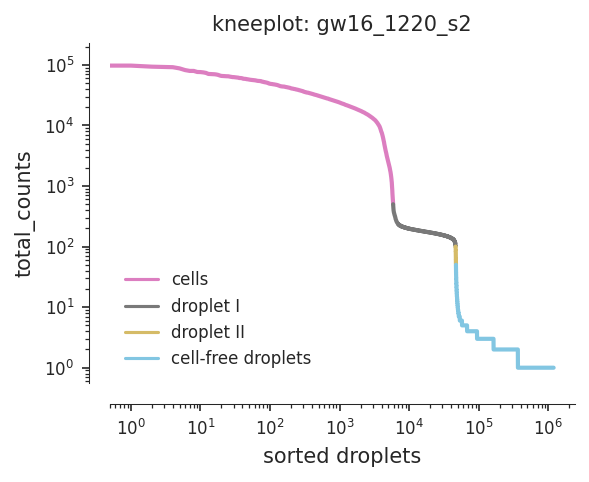

In [342]:
## run scAR (stole this code from Chang)
rank_UMIs = pd.DataFrame(gw16_1220_s2[:,gw16_1220_s2.var['feature_types']=='Gene Expression'].X.sum(axis=1), index = gw16_1220_s2.obs_names, columns=['total_counts'])
rank_UMIs['droplets'] = 'cell-free droplets'
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>50, 'droplet II')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>100, 'droplet I')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>500, 'cells')
rank_UMIs = rank_UMIs.sort_values(by='total_counts', ascending=False).reset_index().rename_axis("rank").reset_index()
rank_UMIs = rank_UMIs.loc[rank_UMIs['total_counts']>0]
rank_UMIs = rank_UMIs.set_index('index').rename_axis('cells')


plt.figure(figsize=(4, 3), dpi=150)

ax = sns.lineplot(data = rank_UMIs,
                  x='rank',
                  y='total_counts',
                  hue='droplets',
                  hue_order=['cells', 'droplet I', 'droplet II', 'cell-free droplets'],
                  palette=sns.color_palette()[-4:],
                  markers=False,
                  lw=2)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('sorted droplets');
ax.legend(loc='lower left', ncol=1, title=None, frameon=False)
ax.set_title(f'kneeplot: gw16_1220_s2');

sns.set_palette("muted")
sns.set_style("ticks")
sns.despine(offset=10, trim=False);

In [343]:
## run scAR (stole this code from Chang)
####################
gw16_1220_s2_filtered = gw16_1220_s2[gw16_1220_s2.obs_names.isin(rank_UMIs[rank_UMIs['droplets']=='cells'].index)] # equal to filtered population as cellranger output
gw16_1220_s2_sticr_filtered = gw16_1220_s2_sticr[gw16_1220_s2_sticr.obs_names.isin(gw16_1220_s2_filtered.obs_names)].to_df() # pandas.DataFrame
gw16_1220_s2_sticr_filtered_empty_droplets = gw16_1220_s2_sticr_raw.loc[gw16_1220_s2_sticr_raw.index.difference(gw16_1220_s2_sticr_filtered.index)]
gw16_1220_s2_sticr_filtered_empty_profile = gw16_1220_s2_sticr_filtered_empty_droplets.sum()/gw16_1220_s2_sticr_filtered_empty_droplets.sum().sum()    # pandas.Series
scarObj = scAR.model(raw_count=gw16_1220_s2_sticr_filtered,
                     empty_profile=gw16_1220_s2_sticr_filtered_empty_profile.values, # In the case of default None, the empty_profile will be calculated by averaging pooled cells
                     scRNAseq_tech='CROPseq')
scarObj.train(epochs=400)
scarObj.inference(feature_type='sgRNAs', cutoff=3)
scarObj.feature_assignment.to_csv(out)
####################

..Running VAE using the following param set:
......scAR mode:  CROPseq
......count model:  binomial
......num_input_feature:  17517
......NN_layer1:  150
......NN_layer2:  100
......latent_space:  15
......dropout_prob:  0
......kld_weight:  1e-05
......lr:  0.001
......lr_step_size:  5
......lr_gamma:  0.97
  Training.....
100%|██████████| 400/400 [28:19<00:00,  4.25s/it]
  Inferring .....


In [344]:
## write the final scAR output to a csv
scarObj.feature_assignment.to_csv(out)

In [345]:
## read the final scAR output back in for further validations/manipulations
bc_csv = pd.read_csv(out)
bc_csv

,Unnamed: 0,sgRNAs,n_sgRNAs
0,AAACCCAAGCCAGTAG,IndexE_Bit1_F_266-Bit2_F_129-Bit3_F_370t,1
1,AAACCCAAGCCTTTCC,IndexE_Bit1_F_139-Bit2_F_059-Bit3_F_018t,1
2,AAACCCAAGGTAGCCA,IndexE_Bit1_F_183-Bit2_F_416-Bit3_F_298t,1
3,AAACCCAGTCTTGCTC,IndexE_Bit1_F_420-Bit2_F_008-Bit3_F_397t,1
4,AAACCCAGTTATTCCT,IndexE_Bit1_F_494-Bit2_F_292-Bit3_F_452t,1
...,...,...,...
5673,TTTGGTTTCTCAGTCC,Index3_Bit1_F_001-Bit2_F_425-Bit3_F_415t,1
5674,TTTGTTGAGAGGTTAT,IndexE_Bit1_F_406-Bit2_F_138-Bit3_F_218t,1
5675,TTTGTTGAGCAGGCTA,IndexE_Bit1_F_114-Bit2_F_051-Bit3_F_210t,1
5676,TTTGTTGCAAATGAAC,Index3_Bit1_F_209-Bit2_F_147-Bit3_F_302t,1


In [346]:
print('n STICR BCs:')
print(len(np.unique(bc_csv['sgRNAs'])))

n STICR BCs:
3728


In [347]:
bc_csv['n_sgRNAs'].value_counts()

1    5595
2      76
3       6
4       1
Name: n_sgRNAs, dtype: int64

In [348]:
sticr_tsv['UMI_Count'].value_counts()

1      254684
2       13943
3        4148
4        1977
5        1173
        ...  
139         1
375         1
180         1
326         1
254         1
Name: UMI_Count, Length: 224, dtype: int64

In [349]:
for n in np.unique(bc_csv.n_sgRNAs):
    print('Number of barcodes in clone: ',str(n))
    print('Total number of cells with given barcodes:')
    print(sum(bc_csv.n_sgRNAs==n))
    print('Unique number of barcodes:')
    print(len(np.unique(bc_csv.loc[bc_csv.n_sgRNAs==n,:].sgRNAs)))
    print('')

Number of barcodes in clone:  1
Total number of cells with given barcodes:
5595
Unique number of barcodes:
3645

Number of barcodes in clone:  2
Total number of cells with given barcodes:
76
Unique number of barcodes:
76

Number of barcodes in clone:  3
Total number of cells with given barcodes:
6
Unique number of barcodes:
6

Number of barcodes in clone:  4
Total number of cells with given barcodes:
1
Unique number of barcodes:
1



In [350]:
bc_csv.columns=['CBC','Clone_barcodes','n_barcodes']
clone_data_df = pd.DataFrame(bc_csv.Clone_barcodes.value_counts())

In [351]:
clone_ids = []
exp_prefix='LS31'
for i in range(0,len(clone_data_df)):
    clone_ids.append(exp_prefix+'_Clone_'+str(i))

In [352]:
clone_data_df['Clone_IDs']=clone_ids

In [353]:
clone_data_df.columns=['Clone_size','Clone_IDs']

In [354]:
clone_index = []
for i in range(0,len(clone_data_df)):
    clone_index.append(clone_data_df.index[i][0:6])

In [355]:
clone_data_df['Clone_Index']=clone_index

In [356]:
clone_data_df

,Clone_size,Clone_IDs,Clone_Index
IndexE_Bit1_F_225-Bit2_F_228-Bit3_F_251t,45,LS31_Clone_0,IndexE
IndexE_Bit1_F_220-Bit2_F_041-Bit3_F_201t,30,LS31_Clone_1,IndexE
IndexE_Bit1_F_357-Bit2_F_351-Bit3_F_492t,18,LS31_Clone_2,IndexE
Index3_Bit1_F_001-Bit2_F_425-Bit3_F_415t,15,LS31_Clone_3,Index3
IndexE_Bit1_F_301-Bit2_F_269-Bit3_F_124t,13,LS31_Clone_4,IndexE
...,...,...,...
IndexE_Bit1_F_155-Bit2_F_207-Bit3_F_068t,1,LS31_Clone_3723,IndexE
IndexE_Bit1_F_112-Bit2_F_110-Bit3_F_159t,1,LS31_Clone_3724,IndexE
IndexE_Bit1_F_015-Bit2_F_260-Bit3_F_391t,1,LS31_Clone_3725,IndexE
IndexE_Bit1_F_237-Bit2_F_204-Bit3_F_258t,1,LS31_Clone_3726,IndexE


In [357]:
clone_data_df['Clone_size'].value_counts()

1     2677
2      671
3      210
4       77
5       29
6       24
7       10
8        7
9        7
10       4
11       3
12       3
13       2
30       1
15       1
18       1
45       1
Name: Clone_size, dtype: int64

In [358]:
bc_csv = bc_csv.merge(clone_data_df, left_on='Clone_barcodes', right_index=True)

In [359]:
bc_csv.to_csv('/media/chang/HDD-11/mgkeefe/230106_MKTN09_local_STICR/230103_STICR_BCs/STICR_outs_GW16_1220/GW16_221220_S2_bcs_final_metadata.csv')

## new processing for 230221 S1:

In [16]:
## load in the Final_Barcodes.tsv output from the STICR pipeline
sticr_tsv = pd.read_csv('/media/chang/HDD-4/mgkeefe/230303_local_STICR/bc_outs/GW19_0221_S1/Final_Barcodes.tsv',
                           sep='\t')
sticr_tsv.index = list(sticr_tsv['CBC'])

In [5]:
## generate a matrix of zeroes with dimensions CBCs (rows) by STICR BCs (columns)
cbc_names = np.unique(sticr_tsv['CBC'])
bc_names = np.unique(sticr_tsv['barcode'])
bc_matrix = np.zeros((len(np.unique(cbc_names)), len(np.unique(bc_names))))
bc_df = pd.DataFrame(bc_matrix, index=list(cbc_names), columns=list(bc_names))

In [6]:
## iterate through every STICR BC and pull the UMI values for a given CBC and map them into the matrix of cells by barcodes
from tqdm import tqdm

for sbc in tqdm(bc_names):
    bc_df.loc[bc_df.index.isin(sticr_tsv['CBC'][sticr_tsv['barcode']==sbc]), bc_df.columns==sbc] = sticr_tsv.loc[sticr_tsv['barcode']==sbc,'UMI_Count']

100%|██████████| 79267/79267 [1:17:34<00:00, 17.03it/s]


In [4]:
## compress the dataframe by turning it into a sparse matrix, which is the input for scanpy
## note: this used to be done in R with DropletUtils, but that stopped working for some reason so doing it this way instead
from scipy.sparse import csr_matrix
import h5sparse
import h5py
import anndata
bc_df_sparse = csr_matrix(bc_df)

NameError: name 'bc_df' is not defined

In [8]:
## convert the sparse matrix back into a dataframe, then parse it with AnnData for scanpy input
## save the scanpy input in h5 format so that the slow matrix generation doesn't have to be done again
bc_df_reformat = pd.DataFrame.sparse.from_spmatrix(bc_df_sparse, index=bc_df.index, columns=bc_df.columns)
bc_df_sc_input = anndata.AnnData(bc_df_reformat)
bc_df_sc_input.write_h5ad('/media/chang/HDD-4/mgkeefe/230303_local_STICR/bc_outs/GW19_0221_S1/GW19_0221_S1_bc_matrix_sparse.h5ad')

In [5]:
## load in the cellranger output and barcode matrix
rna = '/media/chang/HDD-4/mgkeefe/230303_local_STICR/cellranger_outs/GW19_0221_sub_FBS_S1_cellranger/raw_feature_bc_matrix.h5'
sticr = '/media/chang/HDD-4/mgkeefe/230303_local_STICR/bc_outs/GW19_0221_S1/GW19_0221_S1_bc_matrix_sparse.h5ad'
out = '/media/chang/HDD-4/mgkeefe/230303_local_STICR/bc_outs/GW19_0221_S1/GW19_0221_S1_scAR_bcs.csv'
gw19_0221_s1 = sc.read_10x_h5(filename=rna, gex_only=True) # Change this if ur using a different scRNA-seq format
gw19_0221_s1_sticr = sc.read_h5ad(sticr)
gw19_0221_s1_sticr_raw = gw19_0221_s1_sticr.to_df()
gw19_0221_s1_sticr.var_names_make_unique()

In [6]:
## fix the names in the RNA file to remove the -1 from the CBC
fixed_rna_names = gw19_0221_s1.obs_names.tolist()
for c in range(0, len(fixed_rna_names)):
    fixed_rna_names[c] = fixed_rna_names[c][0:-2]
print('old names:')
print(gw19_0221_s1.obs_names[0:10].tolist())
print('fixed names:')
print(fixed_rna_names[0:10])
gw19_0221_s1.obs_names = fixed_rna_names
print('cell names from cellranger:')
print(gw19_0221_s1.obs_names[:10].tolist())
print('cell names from STICR processing:')
print(gw19_0221_s1_sticr.obs_names[:10].tolist())

old names:
['AAACCCAAGAAACACT-1', 'AAACCCAAGAAACCCA-1', 'AAACCCAAGAAACGAA-1', 'AAACCCAAGAAACTAC-1', 'AAACCCAAGAAACTCA-1', 'AAACCCAAGAAAGAAC-1', 'AAACCCAAGAAAGTCT-1', 'AAACCCAAGAAATCCA-1', 'AAACCCAAGAAATGGG-1', 'AAACCCAAGAACAGGA-1']
fixed names:
['AAACCCAAGAAACACT', 'AAACCCAAGAAACCCA', 'AAACCCAAGAAACGAA', 'AAACCCAAGAAACTAC', 'AAACCCAAGAAACTCA', 'AAACCCAAGAAAGAAC', 'AAACCCAAGAAAGTCT', 'AAACCCAAGAAATCCA', 'AAACCCAAGAAATGGG', 'AAACCCAAGAACAGGA']
cell names from cellranger:
['AAACCCAAGAAACACT', 'AAACCCAAGAAACCCA', 'AAACCCAAGAAACGAA', 'AAACCCAAGAAACTAC', 'AAACCCAAGAAACTCA', 'AAACCCAAGAAAGAAC', 'AAACCCAAGAAAGTCT', 'AAACCCAAGAAATCCA', 'AAACCCAAGAAATGGG', 'AAACCCAAGAACAGGA']
cell names from STICR processing:
['AAACCCAAGAACTGAC', 'AAACCCAAGACATCCT', 'AAACCCAAGACATGCG', 'AAACCCAAGACGTCCT', 'AAACCCAAGAGTTGTA', 'AAACCCAAGATAGAGA', 'AAACCCAAGATGCGAC', 'AAACCCAAGATTACGG', 'AAACCCAAGATTGGGC', 'AAACCCAAGCACGATG']


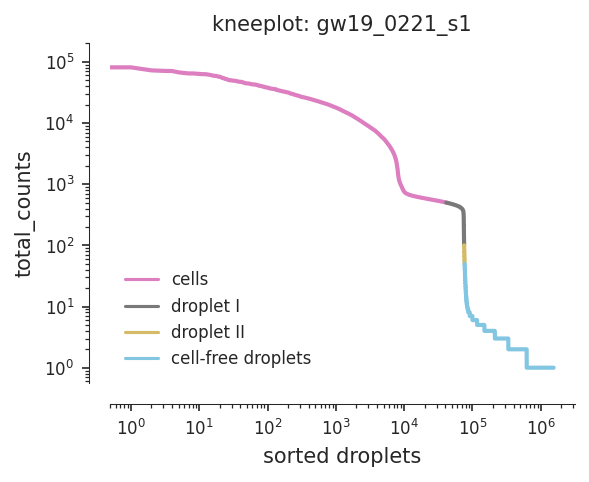

In [8]:
## run scAR (stole this code from Chang)
rank_UMIs = pd.DataFrame(gw19_0221_s1[:,gw19_0221_s1.var['feature_types']=='Gene Expression'].X.sum(axis=1), index = gw19_0221_s1.obs_names, columns=['total_counts'])
rank_UMIs['droplets'] = 'cell-free droplets'
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>50, 'droplet II')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>100, 'droplet I')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>500, 'cells')
rank_UMIs = rank_UMIs.sort_values(by='total_counts', ascending=False).reset_index().rename_axis("rank").reset_index()
rank_UMIs = rank_UMIs.loc[rank_UMIs['total_counts']>0]
rank_UMIs = rank_UMIs.set_index('index').rename_axis('cells')


plt.figure(figsize=(4, 3), dpi=150)

ax = sns.lineplot(data = rank_UMIs,
                  x='rank',
                  y='total_counts',
                  hue='droplets',
                  hue_order=['cells', 'droplet I', 'droplet II', 'cell-free droplets'],
                  palette=sns.color_palette()[-4:],
                  markers=False,
                  lw=2)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('sorted droplets');
ax.legend(loc='lower left', ncol=1, title=None, frameon=False)
ax.set_title(f'kneeplot: gw19_0221_s1');

sns.set_palette("muted")
sns.set_style("ticks")
sns.despine(offset=10, trim=False);

In [9]:
## run scAR (stole this code from Chang)
####################
gw19_0221_s1_filtered = gw19_0221_s1[gw19_0221_s1.obs_names.isin(rank_UMIs[rank_UMIs['droplets']=='cells'].index)] # equal to filtered population as cellranger output
gw19_0221_s1_sticr_filtered = gw19_0221_s1_sticr[gw19_0221_s1_sticr.obs_names.isin(gw19_0221_s1_filtered.obs_names)].to_df() # pandas.DataFrame
gw19_0221_s1_sticr_filtered_empty_droplets = gw19_0221_s1_sticr_raw.loc[gw19_0221_s1_sticr_raw.index.difference(gw19_0221_s1_sticr_filtered.index)]
gw19_0221_s1_sticr_filtered_empty_profile = gw19_0221_s1_sticr_filtered_empty_droplets.sum()/gw19_0221_s1_sticr_filtered_empty_droplets.sum().sum()    # pandas.Series
scarObj = scAR.model(raw_count=gw19_0221_s1_sticr_filtered,
                     empty_profile=gw19_0221_s1_sticr_filtered_empty_profile.values, # In the case of default None, the empty_profile will be calculated by averaging pooled cells
                     scRNAseq_tech='CROPseq')
scarObj.train(epochs=400)
scarObj.inference(feature_type='sgRNAs', cutoff=3)
scarObj.feature_assignment.to_csv(out)
####################

..Running VAE using the following param set:
......scAR mode:  CROPseq
......count model:  binomial
......num_input_feature:  79267
......NN_layer1:  150
......NN_layer2:  100
......latent_space:  15
......dropout_prob:  0
......kld_weight:  1e-05
......lr:  0.001
......lr_step_size:  5
......lr_gamma:  0.97
  Training.....
100%|██████████| 400/400 [14:40:51<00:00, 132.13s/it]  
  Inferring .....


In [11]:
## write the final scAR output to a csv
scarObj.feature_assignment.to_csv(out)

In [12]:
## read the final scAR output back in for further validations/manipulations
bc_csv = pd.read_csv(out)
bc_csv

,Unnamed: 0,sgRNAs,n_sgRNAs
0,AAACCCAAGACATCCT,IndexE_Bit1_F_100-Bit2_F_316-Bit3_F_295t,1
1,AAACCCAAGATGCGAC,Index3_Bit1_F_429-Bit2_F_456-Bit3_F_433t,1
2,AAACCCAAGCCTCTTC,IndexE_Bit1_F_448-Bit2_F_156-Bit3_F_355t,1
3,AAACCCAAGCTGACCC,IndexE_Bit1_F_063-Bit2_F_240-Bit3_F_180t,1
4,AAACCCAAGGATCACG,IndexE_Bit1_F_416-Bit2_F_184-Bit3_F_307t,1
...,...,...,...
35733,TTTGTTGTCTAGTACG,IndexE_Bit1_F_486-Bit2_F_221-Bit3_F_128t,1
35734,TTTGTTGTCTCAGAAC,IndexE_Bit1_F_235-Bit2_F_380-Bit3_F_445t,1
35735,TTTGTTGTCTGAATGC,IndexE_Bit1_F_076-Bit2_F_262-Bit3_F_064t,1
35736,TTTGTTGTCTGCATGA,IndexE_Bit1_F_034-Bit2_F_209-Bit3_F_289t,1


In [13]:
print('n STICR BCs:')
print(len(np.unique(bc_csv['sgRNAs'])))

n STICR BCs:
22344


In [14]:
bc_csv['n_sgRNAs'].value_counts()

1     32392
2      1946
3       570
4       272
5       169
6       113
7        65
8        53
9        37
10       34
12       20
11       19
15        9
14        9
13        9
16        6
17        4
23        2
24        2
18        2
25        1
27        1
19        1
21        1
34        1
Name: n_sgRNAs, dtype: int64

In [17]:
sticr_tsv['UMI_Count'].value_counts()

1      340363
2       21372
3        7204
4        3621
5        2016
        ...  
132         1
148         1
100         1
182         1
154         1
Name: UMI_Count, Length: 175, dtype: int64

In [18]:
for n in np.unique(bc_csv.n_sgRNAs):
    print('Number of barcodes in clone: ',str(n))
    print('Total number of cells with given barcodes:')
    print(sum(bc_csv.n_sgRNAs==n))
    print('Unique number of barcodes:')
    print(len(np.unique(bc_csv.loc[bc_csv.n_sgRNAs==n,:].sgRNAs)))
    print('')

Number of barcodes in clone:  1
Total number of cells with given barcodes:
32392
Unique number of barcodes:
19004

Number of barcodes in clone:  2
Total number of cells with given barcodes:
1946
Unique number of barcodes:
1942

Number of barcodes in clone:  3
Total number of cells with given barcodes:
570
Unique number of barcodes:
569

Number of barcodes in clone:  4
Total number of cells with given barcodes:
272
Unique number of barcodes:
271

Number of barcodes in clone:  5
Total number of cells with given barcodes:
169
Unique number of barcodes:
169

Number of barcodes in clone:  6
Total number of cells with given barcodes:
113
Unique number of barcodes:
113

Number of barcodes in clone:  7
Total number of cells with given barcodes:
65
Unique number of barcodes:
65

Number of barcodes in clone:  8
Total number of cells with given barcodes:
53
Unique number of barcodes:
53

Number of barcodes in clone:  9
Total number of cells with given barcodes:
37
Unique number of barcodes:
37

N

In [19]:
bc_csv.columns=['CBC','Clone_barcodes','n_barcodes']
clone_data_df = pd.DataFrame(bc_csv.Clone_barcodes.value_counts())

In [20]:
clone_ids = []
exp_prefix='LS32'
for i in range(0,len(clone_data_df)):
    clone_ids.append(exp_prefix+'_Clone_'+str(i))

In [21]:
clone_data_df['Clone_IDs']=clone_ids

In [22]:
clone_data_df.columns=['Clone_size','Clone_IDs']

In [23]:
clone_index = []
for i in range(0,len(clone_data_df)):
    clone_index.append(clone_data_df.index[i][0:6])

In [24]:
clone_data_df['Clone_Index']=clone_index

In [25]:
clone_data_df

,Clone_size,Clone_IDs,Clone_Index
Index3_Bit1_F_408-Bit2_F_042-Bit3_F_247t,19,LS32_Clone_0,Index3
Index3_Bit1_F_073-Bit2_F_197-Bit3_F_071t,19,LS32_Clone_1,Index3
IndexE_Bit1_F_255-Bit2_F_353-Bit3_F_304t,17,LS32_Clone_2,IndexE
Index3_Bit1_F_335-Bit2_F_067-Bit3_F_041t,17,LS32_Clone_3,Index3
Index3_Bit1_F_418-Bit2_F_300-Bit3_F_370t,16,LS32_Clone_4,Index3
...,...,...,...
IndexE_Bit1_F_325-Bit2_F_008-Bit3_F_067t,1,LS32_Clone_22339,IndexE
IndexE_Bit1_F_105-Bit2_F_049-Bit3_F_124t,1,LS32_Clone_22340,IndexE
Index3_Bit1_F_057-Bit2_F_108-Bit3_F_128t,1,LS32_Clone_22341,Index3
IndexE_Bit1_F_491-Bit2_F_405-Bit3_F_416t,1,LS32_Clone_22342,IndexE


In [26]:
clone_data_df['Clone_size'].value_counts()

1     15086
2      4113
3      1747
4       729
5       331
6       139
7        67
8        49
9        27
10       21
12       10
11        9
15        5
14        3
17        2
13        2
16        2
19        2
Name: Clone_size, dtype: int64

In [27]:
bc_csv = bc_csv.merge(clone_data_df, left_on='Clone_barcodes', right_index=True)

In [28]:
bc_csv.to_csv('/media/chang/HDD-4/mgkeefe/230303_local_STICR/bc_outs/GW19_0221_S1/GW19_0221_S1_bcs_final_metadata.csv')

## new processing for 230221 S2:

In [30]:
## load in the Final_Barcodes.tsv output from the STICR pipeline
sticr_tsv = pd.read_csv('/media/chang/HDD-4/mgkeefe/230303_local_STICR/bc_outs/GW19_0221_S2/Final_Barcodes.tsv',
                           sep='\t')
sticr_tsv.index = list(sticr_tsv['CBC'])

In [31]:
## generate a matrix of zeroes with dimensions CBCs (rows) by STICR BCs (columns)
cbc_names = np.unique(sticr_tsv['CBC'])
bc_names = np.unique(sticr_tsv['barcode'])
bc_matrix = np.zeros((len(np.unique(cbc_names)), len(np.unique(bc_names))))
bc_df = pd.DataFrame(bc_matrix, index=list(cbc_names), columns=list(bc_names))

In [35]:
## iterate through every STICR BC and pull the UMI values for a given CBC and map them into the matrix of cells by barcodes
from tqdm import tqdm

for sbc in tqdm(bc_names):
    bc_df.loc[bc_df.index.isin(sticr_tsv['CBC'][sticr_tsv['barcode']==sbc]), bc_df.columns==sbc] = sticr_tsv.loc[sticr_tsv['barcode']==sbc,'UMI_Count']

100%|██████████| 44225/44225 [15:34<00:00, 47.34it/s]


In [36]:
## compress the dataframe by turning it into a sparse matrix, which is the input for scanpy
## note: this used to be done in R with DropletUtils, but that stopped working for some reason so doing it this way instead
from scipy.sparse import csr_matrix
import h5sparse
import h5py
import anndata
bc_df_sparse = csr_matrix(bc_df)

In [37]:
## convert the sparse matrix back into a dataframe, then parse it with AnnData for scanpy input
## save the scanpy input in h5 format so that the slow matrix generation doesn't have to be done again
bc_df_reformat = pd.DataFrame.sparse.from_spmatrix(bc_df_sparse, index=bc_df.index, columns=bc_df.columns)
bc_df_sc_input = anndata.AnnData(bc_df_reformat)
bc_df_sc_input.write_h5ad('/media/chang/HDD-4/mgkeefe/230303_local_STICR/bc_outs/GW19_0221_S2/GW19_0221_S2_bc_matrix_sparse.h5ad')

In [38]:
## load in the cellranger output and barcode matrix
rna = '/media/chang/HDD-4/mgkeefe/230303_local_STICR/cellranger_outs/GW19_0221_sub_FBS_S2_cellranger/raw_feature_bc_matrix.h5'
sticr = '/media/chang/HDD-4/mgkeefe/230303_local_STICR/bc_outs/GW19_0221_S2/GW19_0221_S2_bc_matrix_sparse.h5ad'
out = '/media/chang/HDD-4/mgkeefe/230303_local_STICR/bc_outs/GW19_0221_S2/GW19_0221_S2_scAR_bcs.csv'
gw19_0221_s2 = sc.read_10x_h5(filename=rna, gex_only=True) # Change this if ur using a different scRNA-seq format
gw19_0221_s2_sticr = sc.read_h5ad(sticr)
gw19_0221_s2_sticr_raw = gw19_0221_s2_sticr.to_df()
gw19_0221_s2_sticr.var_names_make_unique()

In [39]:
## fix the names in the RNA file to remove the -1 from the CBC
fixed_rna_names = gw19_0221_s2.obs_names.tolist()
for c in range(0, len(fixed_rna_names)):
    fixed_rna_names[c] = fixed_rna_names[c][0:-2]
print('old names:')
print(gw19_0221_s2.obs_names[0:10].tolist())
print('fixed names:')
print(fixed_rna_names[0:10])
gw19_0221_s2.obs_names = fixed_rna_names
print('cell names from cellranger:')
print(gw19_0221_s2.obs_names[:10].tolist())
print('cell names from STICR processing:')
print(gw19_0221_s2_sticr.obs_names[:10].tolist())

old names:
['AAACCCAAGAAACCCA-1', 'AAACCCAAGAAACCCG-1', 'AAACCCAAGAAATCCA-1', 'AAACCCAAGAAATTCG-1', 'AAACCCAAGAACGTGC-1', 'AAACCCAAGAAGATCT-1', 'AAACCCAAGAAGCCAC-1', 'AAACCCAAGAAGCCAT-1', 'AAACCCAAGAAGTATC-1', 'AAACCCAAGAATCGAT-1']
fixed names:
['AAACCCAAGAAACCCA', 'AAACCCAAGAAACCCG', 'AAACCCAAGAAATCCA', 'AAACCCAAGAAATTCG', 'AAACCCAAGAACGTGC', 'AAACCCAAGAAGATCT', 'AAACCCAAGAAGCCAC', 'AAACCCAAGAAGCCAT', 'AAACCCAAGAAGTATC', 'AAACCCAAGAATCGAT']
cell names from cellranger:
['AAACCCAAGAAACCCA', 'AAACCCAAGAAACCCG', 'AAACCCAAGAAATCCA', 'AAACCCAAGAAATTCG', 'AAACCCAAGAACGTGC', 'AAACCCAAGAAGATCT', 'AAACCCAAGAAGCCAC', 'AAACCCAAGAAGCCAT', 'AAACCCAAGAAGTATC', 'AAACCCAAGAATCGAT']
cell names from STICR processing:
['AAACCCAAGAATCGAT', 'AAACCCAAGAATTTGG', 'AAACCCAAGAGTTGCG', 'AAACCCAAGCGTCTGC', 'AAACCCAAGCTCAGAA', 'AAACCCAAGCTCTGCA', 'AAACCCAAGCTCTGTA', 'AAACCCAAGGCACAAC', 'AAACCCAAGGCACGAC', 'AAACCCAAGGCACGAT']


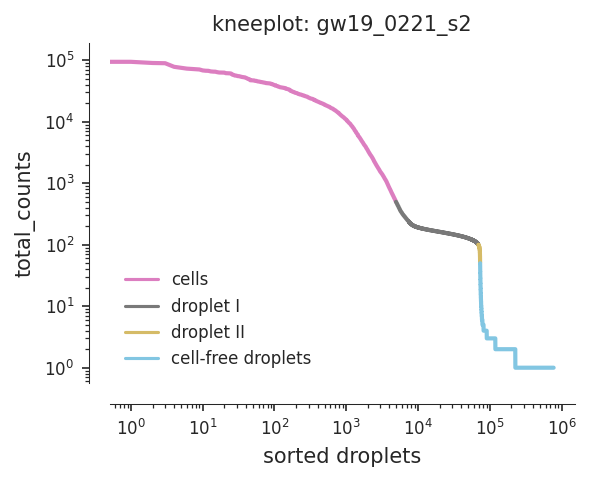

In [40]:
## run scAR (stole this code from Chang)
rank_UMIs = pd.DataFrame(gw19_0221_s2[:,gw19_0221_s2.var['feature_types']=='Gene Expression'].X.sum(axis=1), index = gw19_0221_s2.obs_names, columns=['total_counts'])
rank_UMIs['droplets'] = 'cell-free droplets'
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>50, 'droplet II')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>100, 'droplet I')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>500, 'cells')
rank_UMIs = rank_UMIs.sort_values(by='total_counts', ascending=False).reset_index().rename_axis("rank").reset_index()
rank_UMIs = rank_UMIs.loc[rank_UMIs['total_counts']>0]
rank_UMIs = rank_UMIs.set_index('index').rename_axis('cells')


plt.figure(figsize=(4, 3), dpi=150)

ax = sns.lineplot(data = rank_UMIs,
                  x='rank',
                  y='total_counts',
                  hue='droplets',
                  hue_order=['cells', 'droplet I', 'droplet II', 'cell-free droplets'],
                  palette=sns.color_palette()[-4:],
                  markers=False,
                  lw=2)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('sorted droplets');
ax.legend(loc='lower left', ncol=1, title=None, frameon=False)
ax.set_title(f'kneeplot: gw19_0221_s2');

sns.set_palette("muted")
sns.set_style("ticks")
sns.despine(offset=10, trim=False);

In [41]:
## run scAR (stole this code from Chang)
####################
gw19_0221_s2_filtered = gw19_0221_s2[gw19_0221_s2.obs_names.isin(rank_UMIs[rank_UMIs['droplets']=='cells'].index)] # equal to filtered population as cellranger output
gw19_0221_s2_sticr_filtered = gw19_0221_s2_sticr[gw19_0221_s2_sticr.obs_names.isin(gw19_0221_s2_filtered.obs_names)].to_df() # pandas.DataFrame
gw19_0221_s2_sticr_filtered_empty_droplets = gw19_0221_s2_sticr_raw.loc[gw19_0221_s2_sticr_raw.index.difference(gw19_0221_s2_sticr_filtered.index)]
gw19_0221_s2_sticr_filtered_empty_profile = gw19_0221_s2_sticr_filtered_empty_droplets.sum()/gw19_0221_s2_sticr_filtered_empty_droplets.sum().sum()    # pandas.Series
scarObj = scAR.model(raw_count=gw19_0221_s2_sticr_filtered,
                     empty_profile=gw19_0221_s2_sticr_filtered_empty_profile.values, # In the case of default None, the empty_profile will be calculated by averaging pooled cells
                     scRNAseq_tech='CROPseq')
scarObj.train(epochs=400)
scarObj.inference(feature_type='sgRNAs', cutoff=3)
scarObj.feature_assignment.to_csv(out)
####################

..Running VAE using the following param set:
......scAR mode:  CROPseq
......count model:  binomial
......num_input_feature:  44225
......NN_layer1:  150
......NN_layer2:  100
......latent_space:  15
......dropout_prob:  0
......kld_weight:  1e-05
......lr:  0.001
......lr_step_size:  5
......lr_gamma:  0.97
  Training.....
100%|██████████| 400/400 [41:06<00:00,  6.17s/it]
  Inferring .....


In [42]:
## write the final scAR output to a csv
scarObj.feature_assignment.to_csv(out)

In [43]:
## read the final scAR output back in for further validations/manipulations
bc_csv = pd.read_csv(out)
bc_csv

,Unnamed: 0,sgRNAs,n_sgRNAs
0,AAACCCAAGTAATTGG,Index3_Bit1_F_407-Bit2_F_055-Bit3_F_409t,1
1,AAACCCACAGTTTCGA,IndexE_Bit1_F_286-Bit2_F_326-Bit3_F_130t,1
2,AAACCCACATAACGGG,IndexE_Bit1_F_456-Bit2_F_333-Bit3_F_406t,1
3,AAACGCTCAGATACTC,Index3_Bit1_F_067-Bit2_F_279-Bit3_F_269t,1
4,AAACGCTGTCCGCAGT,IndexE_Bit1_F_463-Bit2_F_034-Bit3_F_202t,1
...,...,...,...
3899,TTTGGTTGTCCTTTGC,IndexE_Bit1_F_366-Bit2_F_262-Bit3_F_379t,1
3900,TTTGGTTTCGGTCTAA,IndexE_Bit1_F_055-Bit2_F_008-Bit3_F_029t,1
3901,TTTGTTGAGAGTCTTC,IndexE_Bit1_F_195-Bit2_F_144-Bit3_F_085t,1
3902,TTTGTTGGTATGGAAT,IndexE_Bit1_F_146-Bit2_F_252-Bit3_F_331t,1


In [44]:
print('n STICR BCs:')
print(len(np.unique(bc_csv['sgRNAs'])))

n STICR BCs:
2914


In [45]:
bc_csv['n_sgRNAs'].value_counts()

1     3623
2      138
3       50
5       24
4       21
6       12
7       11
9        6
8        5
11       5
13       3
36       1
12       1
16       1
15       1
18       1
10       1
Name: n_sgRNAs, dtype: int64

In [46]:
sticr_tsv['UMI_Count'].value_counts()

1      118360
2       10778
3        4045
4        2169
5        1362
        ...  
308         1
116         1
218         1
262         1
114         1
Name: UMI_Count, Length: 202, dtype: int64

In [47]:
for n in np.unique(bc_csv.n_sgRNAs):
    print('Number of barcodes in clone: ',str(n))
    print('Total number of cells with given barcodes:')
    print(sum(bc_csv.n_sgRNAs==n))
    print('Unique number of barcodes:')
    print(len(np.unique(bc_csv.loc[bc_csv.n_sgRNAs==n,:].sgRNAs)))
    print('')

Number of barcodes in clone:  1
Total number of cells with given barcodes:
3623
Unique number of barcodes:
2633

Number of barcodes in clone:  2
Total number of cells with given barcodes:
138
Unique number of barcodes:
138

Number of barcodes in clone:  3
Total number of cells with given barcodes:
50
Unique number of barcodes:
50

Number of barcodes in clone:  4
Total number of cells with given barcodes:
21
Unique number of barcodes:
21

Number of barcodes in clone:  5
Total number of cells with given barcodes:
24
Unique number of barcodes:
24

Number of barcodes in clone:  6
Total number of cells with given barcodes:
12
Unique number of barcodes:
12

Number of barcodes in clone:  7
Total number of cells with given barcodes:
11
Unique number of barcodes:
11

Number of barcodes in clone:  8
Total number of cells with given barcodes:
5
Unique number of barcodes:
5

Number of barcodes in clone:  9
Total number of cells with given barcodes:
6
Unique number of barcodes:
6

Number of barcode

In [48]:
bc_csv.columns=['CBC','Clone_barcodes','n_barcodes']
clone_data_df = pd.DataFrame(bc_csv.Clone_barcodes.value_counts())

In [51]:
clone_ids = []
exp_prefix='LS33'
for i in range(0,len(clone_data_df)):
    clone_ids.append(exp_prefix+'_Clone_'+str(i))

In [52]:
clone_data_df['Clone_IDs']=clone_ids

In [53]:
clone_data_df.columns=['Clone_size','Clone_IDs']

In [54]:
clone_index = []
for i in range(0,len(clone_data_df)):
    clone_index.append(clone_data_df.index[i][0:6])

In [55]:
clone_data_df['Clone_Index']=clone_index

In [56]:
clone_data_df

,Clone_size,Clone_IDs,Clone_Index
IndexE_Bit1_F_351-Bit2_F_339-Bit3_F_326t,27,LS33_Clone_0,IndexE
IndexE_Bit1_F_311-Bit2_F_015-Bit3_F_246t,26,LS33_Clone_1,IndexE
IndexE_Bit1_F_289-Bit2_F_059-Bit3_F_351t,19,LS33_Clone_2,IndexE
IndexE_Bit1_F_222-Bit2_F_002-Bit3_F_442t,15,LS33_Clone_3,IndexE
Index3_Bit1_F_361-Bit2_F_361-Bit3_F_025t,9,LS33_Clone_4,Index3
...,...,...,...
Index3_Bit1_F_290-Bit2_F_104-Bit3_F_266t,1,LS33_Clone_2909,Index3
IndexE_Bit1_F_263-Bit2_F_060-Bit3_F_227t,1,LS33_Clone_2910,IndexE
IndexE_Bit1_F_171-Bit2_F_375-Bit3_F_414t,1,LS33_Clone_2911,IndexE
IndexE_Bit1_F_079-Bit2_F_439-Bit3_F_333t,1,LS33_Clone_2912,IndexE


In [57]:
clone_data_df['Clone_size'].value_counts()

1     2301
2      425
3      126
4       24
5       21
6        7
7        4
27       1
26       1
19       1
15       1
9        1
8        1
Name: Clone_size, dtype: int64

In [58]:
bc_csv = bc_csv.merge(clone_data_df, left_on='Clone_barcodes', right_index=True)

In [59]:
bc_csv.to_csv('/media/chang/HDD-4/mgkeefe/230303_local_STICR/bc_outs/GW19_0221_S2/GW19_0221_S2_bcs_final_metadata.csv')

## new processing for 230308 PFC 2S:

In [64]:
## load in the Final_Barcodes.tsv output from the STICR pipeline
sticr_tsv = pd.read_csv('/media/chang/HDD-4/mgkeefe/230317_local_STICR/barcodes/bc_outs_PFC_2S/Final_Barcodes.tsv',
                           sep='\t')
sticr_tsv.index = list(sticr_tsv['CBC'])

In [65]:
## generate a matrix of zeroes with dimensions CBCs (rows) by STICR BCs (columns)
cbc_names = np.unique(sticr_tsv['CBC'])
bc_names = np.unique(sticr_tsv['barcode'])
bc_matrix = np.zeros((len(np.unique(cbc_names)), len(np.unique(bc_names))))
bc_df = pd.DataFrame(bc_matrix, index=list(cbc_names), columns=list(bc_names))

In [66]:
## iterate through every STICR BC and pull the UMI values for a given CBC and map them into the matrix of cells by barcodes
from tqdm import tqdm

for sbc in tqdm(bc_names):
    bc_df.loc[bc_df.index.isin(sticr_tsv['CBC'][sticr_tsv['barcode']==sbc]), bc_df.columns==sbc] = sticr_tsv.loc[sticr_tsv['barcode']==sbc,'UMI_Count']

100%|██████████| 22067/22067 [10:00<00:00, 36.72it/s]


In [67]:
## compress the dataframe by turning it into a sparse matrix, which is the input for scanpy
## note: this used to be done in R with DropletUtils, but that stopped working for some reason so doing it this way instead
from scipy.sparse import csr_matrix
import h5sparse
import h5py
import anndata
bc_df_sparse = csr_matrix(bc_df)

In [68]:
file_idx = 'GW20_0308_PFC_2S'

In [69]:
## convert the sparse matrix back into a dataframe, then parse it with AnnData for scanpy input
## save the scanpy input in h5 format so that the slow matrix generation doesn't have to be done again
bc_df_reformat = pd.DataFrame.sparse.from_spmatrix(bc_df_sparse, index=bc_df.index, columns=bc_df.columns)
bc_df_sc_input = anndata.AnnData(bc_df_reformat)
bc_df_sc_input.write_h5ad('/media/chang/HDD-4/mgkeefe/230317_local_STICR/barcodes/bc_outs_PFC_2S/'+file_idx+'_bc_matrix_sparse.h5ad')

In [117]:
## load in the cellranger output and barcode matrix
rna = '/media/chang/HDD-4/mgkeefe/230317_local_STICR/transcriptome/cellranger_outs/GW20_230308_sub_FBS_PFC_2S_cellranger/raw_feature_bc_matrix.h5'
sticr = '/media/chang/HDD-4/mgkeefe/230317_local_STICR/barcodes/bc_outs_PFC_2S/'+file_idx+'_bc_matrix_sparse.h5ad'
out = '/media/chang/HDD-4/mgkeefe/230317_local_STICR/barcodes/bc_outs_PFC_2S/'+file_idx+'_scAR_bcs.csv'
data_rna = sc.read_10x_h5(filename=rna, gex_only=True) # Change this if ur using a different scRNA-seq format
data_sticr = sc.read_h5ad(sticr)
data_sticr_raw = data_sticr.to_df()
data_sticr.var_names_make_unique()

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/media/chang/HDD-4/mgkeefe/230317_local_STICR/barcodes/bc_outs_PFC_2S/GW20_0308_V1_S1_bc_matrix_sparse.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [71]:
## fix the names in the RNA file to remove the -1 from the CBC
fixed_rna_names = data_rna.obs_names.tolist()
for c in range(0, len(fixed_rna_names)):
    fixed_rna_names[c] = fixed_rna_names[c][0:-2]
print('old names:')
print(data_rna.obs_names[0:10].tolist())
print('fixed names:')
print(fixed_rna_names[0:10])
data_rna.obs_names = fixed_rna_names
print('cell names from cellranger:')
print(data_rna.obs_names[:10].tolist())
print('cell names from STICR processing:')
print(data_sticr.obs_names[:10].tolist())

old names:
['AAACCCAAGAAACCCA-1', 'AAACCCAAGAAACCCG-1', 'AAACCCAAGAAACTAC-1', 'AAACCCAAGAAAGAAC-1', 'AAACCCAAGAAAGACA-1', 'AAACCCAAGAAATTCG-1', 'AAACCCAAGAAATTGC-1', 'AAACCCAAGAACAGGA-1', 'AAACCCAAGAACCGCA-1', 'AAACCCAAGAACTGAT-1']
fixed names:
['AAACCCAAGAAACCCA', 'AAACCCAAGAAACCCG', 'AAACCCAAGAAACTAC', 'AAACCCAAGAAAGAAC', 'AAACCCAAGAAAGACA', 'AAACCCAAGAAATTCG', 'AAACCCAAGAAATTGC', 'AAACCCAAGAACAGGA', 'AAACCCAAGAACCGCA', 'AAACCCAAGAACTGAT']
cell names from cellranger:
['AAACCCAAGAAACCCA', 'AAACCCAAGAAACCCG', 'AAACCCAAGAAACTAC', 'AAACCCAAGAAAGAAC', 'AAACCCAAGAAAGACA', 'AAACCCAAGAAATTCG', 'AAACCCAAGAAATTGC', 'AAACCCAAGAACAGGA', 'AAACCCAAGAACCGCA', 'AAACCCAAGAACTGAT']
cell names from STICR processing:
['AAACCCAAGACAAGCC', 'AAACCCAAGACCATAA', 'AAACCCAAGACCTCCG', 'AAACCCAAGACTAAGT', 'AAACCCAAGAGCATCG', 'AAACCCAAGAGGACTC', 'AAACCCAAGATACAGT', 'AAACCCAAGATGACCG', 'AAACCCAAGATTAGTG', 'AAACCCAAGATTCACT']


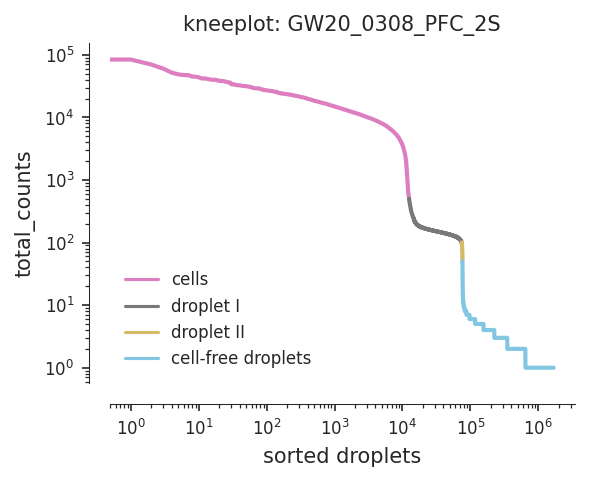

In [72]:
## run scAR (stole this code from Chang)
rank_UMIs = pd.DataFrame(data_rna[:,data_rna.var['feature_types']=='Gene Expression'].X.sum(axis=1), index = data_rna.obs_names, columns=['total_counts'])
rank_UMIs['droplets'] = 'cell-free droplets'
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>50, 'droplet II')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>100, 'droplet I')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>500, 'cells')
rank_UMIs = rank_UMIs.sort_values(by='total_counts', ascending=False).reset_index().rename_axis("rank").reset_index()
rank_UMIs = rank_UMIs.loc[rank_UMIs['total_counts']>0]
rank_UMIs = rank_UMIs.set_index('index').rename_axis('cells')


plt.figure(figsize=(4, 3), dpi=150)

ax = sns.lineplot(data = rank_UMIs,
                  x='rank',
                  y='total_counts',
                  hue='droplets',
                  hue_order=['cells', 'droplet I', 'droplet II', 'cell-free droplets'],
                  palette=sns.color_palette()[-4:],
                  markers=False,
                  lw=2)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('sorted droplets');
ax.legend(loc='lower left', ncol=1, title=None, frameon=False)
ax.set_title(f'kneeplot: '+file_idx);

sns.set_palette("muted")
sns.set_style("ticks")
sns.despine(offset=10, trim=False);

In [73]:
## run scAR (stole this code from Chang)
####################
data_rna_filtered = data_rna[data_rna.obs_names.isin(rank_UMIs[rank_UMIs['droplets']=='cells'].index)] # equal to filtered population as cellranger output
data_sticr_filtered = data_sticr[data_sticr.obs_names.isin(data_rna_filtered.obs_names)].to_df() # pandas.DataFrame
data_sticr_filtered_empty_droplets = data_sticr_raw.loc[data_sticr_raw.index.difference(data_sticr_filtered.index)]
data_sticr_filtered_empty_profile = data_sticr_filtered_empty_droplets.sum()/data_sticr_filtered_empty_droplets.sum().sum()    # pandas.Series
scarObj = scAR.model(raw_count=data_sticr_filtered,
                     empty_profile=data_sticr_filtered_empty_profile.values, # In the case of default None, the empty_profile will be calculated by averaging pooled cells
                     scRNAseq_tech='CROPseq')
scarObj.train(epochs=400)
scarObj.inference(feature_type='sgRNAs', cutoff=3)
scarObj.feature_assignment.to_csv(out)
####################

..Running VAE using the following param set:
......scAR mode:  CROPseq
......count model:  binomial
......num_input_feature:  22067
......NN_layer1:  150
......NN_layer2:  100
......latent_space:  15
......dropout_prob:  0
......kld_weight:  1e-05
......lr:  0.001
......lr_step_size:  5
......lr_gamma:  0.97
  Training.....
100%|██████████| 400/400 [1:21:54<00:00, 12.29s/it] 
  Inferring .....


In [118]:
## write the final scAR output to a csv
scarObj.feature_assignment.to_csv(out)

In [119]:
## read the final scAR output back in for further validations/manipulations
bc_csv = pd.read_csv(out)
bc_csv

,Unnamed: 0,sgRNAs,n_sgRNAs
0,AAACCCAAGACGGAAA,IndexE_Bit1_F_328-Bit2_F_373-Bit3_F_089t,1
1,AAACCCAAGATAGTGT,Index3_Bit1_F_288-Bit2_F_331-Bit3_F_148t,1
2,AAACCCAAGCTCGACC,IndexE_Bit1_F_301-Bit2_F_109-Bit3_F_170t,1
3,AAACCCAAGCTGGTGA,IndexE_Bit1_F_013-Bit2_F_346-Bit3_F_183t,1
4,AAACCCAAGGAAACGA,IndexE_Bit1_F_107-Bit2_F_441-Bit3_F_437t,1
...,...,...,...
14620,TTTGTTGTCCGCTTAC,Index3_Bit1_F_022-Bit2_F_159-Bit3_F_304t,1
14621,TTTGTTGTCGCACGAC,IndexE_Bit1_F_120-Bit2_F_040-Bit3_F_448t,1
14622,TTTGTTGTCTCATGCC,IndexE_Bit1_F_468-Bit2_F_393-Bit3_F_071t,1
14623,TTTGTTGTCTGTTCAT,IndexE_Bit1_F_254-Bit2_F_056-Bit3_F_397t,1


In [120]:
print('n STICR BCs:')
print(len(np.unique(bc_csv['sgRNAs'])))

n STICR BCs:
10523


In [77]:
bc_csv['n_sgRNAs'].value_counts()

1    11508
2      176
3        7
4        4
5        1
Name: n_sgRNAs, dtype: int64

In [78]:
sticr_tsv['UMI_Count'].value_counts()

1      174133
2        9389
3        2767
4        1558
5        1166
        ...  
111         1
149         1
103         1
109         1
128         1
Name: UMI_Count, Length: 122, dtype: int64

In [79]:
for n in np.unique(bc_csv.n_sgRNAs):
    print('Number of barcodes in clone: ',str(n))
    print('Total number of cells with given barcodes:')
    print(sum(bc_csv.n_sgRNAs==n))
    print('Unique number of barcodes:')
    print(len(np.unique(bc_csv.loc[bc_csv.n_sgRNAs==n,:].sgRNAs)))
    print('')

Number of barcodes in clone:  1
Total number of cells with given barcodes:
11508
Unique number of barcodes:
8204

Number of barcodes in clone:  2
Total number of cells with given barcodes:
176
Unique number of barcodes:
176

Number of barcodes in clone:  3
Total number of cells with given barcodes:
7
Unique number of barcodes:
7

Number of barcodes in clone:  4
Total number of cells with given barcodes:
4
Unique number of barcodes:
4

Number of barcodes in clone:  5
Total number of cells with given barcodes:
1
Unique number of barcodes:
1



In [80]:
bc_csv.columns=['CBC','Clone_barcodes','n_barcodes']
clone_data_df = pd.DataFrame(bc_csv.Clone_barcodes.value_counts())

In [81]:
clone_ids = []
exp_prefix='LS33'
for i in range(0,len(clone_data_df)):
    clone_ids.append(exp_prefix+'_Clone_'+str(i))

In [82]:
clone_data_df['Clone_IDs']=clone_ids

In [83]:
clone_data_df.columns=['Clone_size','Clone_IDs']

In [84]:
clone_index = []
for i in range(0,len(clone_data_df)):
    clone_index.append(clone_data_df.index[i][0:6])

In [85]:
clone_data_df['Clone_Index']=clone_index

In [86]:
clone_data_df

,Clone_size,Clone_IDs,Clone_Index
Index3_Bit1_F_461-Bit2_F_026-Bit3_F_004t,24,LS33_Clone_0,Index3
Index3_Bit1_F_060-Bit2_F_292-Bit3_F_197t,15,LS33_Clone_1,Index3
IndexE_Bit1_F_073-Bit2_F_346-Bit3_F_249t,14,LS33_Clone_2,IndexE
Index3_Bit1_F_325-Bit2_F_328-Bit3_F_219t,14,LS33_Clone_3,Index3
IndexE_Bit1_F_029-Bit2_F_198-Bit3_F_201t,13,LS33_Clone_4,IndexE
...,...,...,...
IndexE_Bit1_F_198-Bit2_F_474-Bit3_F_104t,1,LS33_Clone_8387,IndexE
Index3_Bit1_F_252-Bit2_F_390-Bit3_F_023t,1,LS33_Clone_8388,Index3
IndexE_Bit1_F_003-Bit2_F_448-Bit3_F_366t,1,LS33_Clone_8389,IndexE
Index3_Bit1_F_192-Bit2_F_216-Bit3_F_095t,1,LS33_Clone_8390,Index3


In [87]:
clone_data_df['Clone_size'].value_counts()

1     6537
2     1252
3      295
4      131
5       65
6       36
7       22
8       19
10       9
9        8
12       6
13       5
11       3
14       2
24       1
15       1
Name: Clone_size, dtype: int64

In [88]:
bc_csv = bc_csv.merge(clone_data_df, left_on='Clone_barcodes', right_index=True)

In [89]:
bc_csv.to_csv('/media/chang/HDD-4/mgkeefe/230317_local_STICR/barcodes/bc_outs_PFC_2S/'+file_idx+'_bcs_final_metadata.csv')

In [147]:
##fix the index names:

In [172]:
file_idx = 'GW20_0308_PFC_2S'

In [154]:
bc_csv = pd.read_csv('/media/chang/HDD-4/mgkeefe/230317_local_STICR/barcodes/bc_outs_PFC_2S/'+file_idx+'_bcs_final_metadata.csv')

In [155]:
bc_csv

,Unnamed: 0,CBC,Clone_barcodes,n_barcodes,Clone_size,Clone_IDs,Clone_Index
0,0,AAACCCAAGATGACCG,IndexE_Bit1_F_019-Bit2_F_125-Bit3_F_414t,1,3,LS33_Clone_504,IndexE
1,1222,ACTTTCACACACAGAG,IndexE_Bit1_F_019-Bit2_F_125-Bit3_F_414t,1,3,LS33_Clone_504,IndexE
2,5724,GAAGCGACAAGCACCC,IndexE_Bit1_F_019-Bit2_F_125-Bit3_F_414t,1,3,LS33_Clone_504,IndexE
3,1,AAACCCAAGATTGAGT,IndexE_Bit1_F_489-Bit2_F_009-Bit3_F_067t,1,2,LS33_Clone_1004,IndexE
4,7330,GGGTTTACACTGTCCT,IndexE_Bit1_F_489-Bit2_F_009-Bit3_F_067t,1,2,LS33_Clone_1004,IndexE
...,...,...,...,...,...,...,...
11691,11680,TTTGGTTCATAGAATG,Index3_Bit1_F_019-Bit2_F_239-Bit3_F_063t,1,1,LS33_Clone_2792,Index3
11692,11682,TTTGGTTGTCACTACA,Index3_Bit1_F_157-Bit2_F_131-Bit3_F_151t,1,1,LS33_Clone_2799,Index3
11693,11684,TTTGGTTTCCAACTGA,Index3_Bit1_F_442-Bit2_F_054-Bit3_F_455t,1,1,LS33_Clone_2800,Index3
11694,11691,TTTGTTGGTCCAATCA,IndexE_Bit1_F_028-Bit2_F_152-Bit3_F_203t,1,1,LS33_Clone_2801,IndexE


In [173]:
## read the final scAR output back in for further validations/manipulations
bc_csv = pd.read_csv('/media/chang/HDD-4/mgkeefe/230317_local_STICR/barcodes/bc_outs_PFC_2S/GW20_0308_PFC_2S_scAR_bcs.csv')
bc_csv

,Unnamed: 0,sgRNAs,n_sgRNAs
0,AAACCCAAGATGACCG,IndexE_Bit1_F_019-Bit2_F_125-Bit3_F_414t,1
1,AAACCCAAGATTGAGT,IndexE_Bit1_F_489-Bit2_F_009-Bit3_F_067t,1
2,AAACCCAAGCACTCAT,IndexE_Bit1_F_067-Bit2_F_444-Bit3_F_284t,1
3,AAACCCAAGTATGTAG,Index3_Bit1_F_117-Bit2_F_272-Bit3_F_031t,1
4,AAACCCAAGTCAGAGC,Index3_Bit1_F_134-Bit2_F_105-Bit3_F_351t,1
...,...,...,...
11691,TTTGTTGGTCCAATCA,IndexE_Bit1_F_028-Bit2_F_152-Bit3_F_203t,1
11692,TTTGTTGGTTAGTCGT,Index3_Bit1_F_412-Bit2_F_390-Bit3_F_385t,1
11693,TTTGTTGTCCGCAACG,Index3_Bit1_F_210-Bit2_F_424-Bit3_F_370t,1
11694,TTTGTTGTCGGTCTGG,Index3_Bit1_F_192-Bit2_F_133-Bit3_F_378t,1


In [174]:
bc_csv.columns=['CBC','Clone_barcodes','n_barcodes']
clone_data_df = pd.DataFrame(bc_csv.Clone_barcodes.value_counts())

In [175]:
clone_data_df

,Clone_barcodes
Index3_Bit1_F_461-Bit2_F_026-Bit3_F_004t,24
Index3_Bit1_F_060-Bit2_F_292-Bit3_F_197t,15
IndexE_Bit1_F_073-Bit2_F_346-Bit3_F_249t,14
Index3_Bit1_F_325-Bit2_F_328-Bit3_F_219t,14
IndexE_Bit1_F_029-Bit2_F_198-Bit3_F_201t,13
...,...
IndexE_Bit1_F_198-Bit2_F_474-Bit3_F_104t,1
Index3_Bit1_F_252-Bit2_F_390-Bit3_F_023t,1
IndexE_Bit1_F_003-Bit2_F_448-Bit3_F_366t,1
Index3_Bit1_F_192-Bit2_F_216-Bit3_F_095t,1


In [176]:
clone_ids = []
exp_prefix='LS36'
for i in range(0,len(clone_data_df)):
    clone_ids.append(exp_prefix+'_Clone_'+str(i))

In [177]:
clone_data_df['Clone_IDs']=clone_ids

In [178]:
clone_data_df.columns=['Clone_size','Clone_IDs']

In [179]:
clone_index = []
for i in range(0,len(clone_data_df)):
    clone_index.append(clone_data_df.index[i][0:6])

In [180]:
clone_data_df['Clone_Index']=clone_index

In [181]:
clone_data_df

,Clone_size,Clone_IDs,Clone_Index
Index3_Bit1_F_461-Bit2_F_026-Bit3_F_004t,24,LS36_Clone_0,Index3
Index3_Bit1_F_060-Bit2_F_292-Bit3_F_197t,15,LS36_Clone_1,Index3
IndexE_Bit1_F_073-Bit2_F_346-Bit3_F_249t,14,LS36_Clone_2,IndexE
Index3_Bit1_F_325-Bit2_F_328-Bit3_F_219t,14,LS36_Clone_3,Index3
IndexE_Bit1_F_029-Bit2_F_198-Bit3_F_201t,13,LS36_Clone_4,IndexE
...,...,...,...
IndexE_Bit1_F_198-Bit2_F_474-Bit3_F_104t,1,LS36_Clone_8387,IndexE
Index3_Bit1_F_252-Bit2_F_390-Bit3_F_023t,1,LS36_Clone_8388,Index3
IndexE_Bit1_F_003-Bit2_F_448-Bit3_F_366t,1,LS36_Clone_8389,IndexE
Index3_Bit1_F_192-Bit2_F_216-Bit3_F_095t,1,LS36_Clone_8390,Index3


In [182]:
clone_data_df['Clone_size'].value_counts()

1     6537
2     1252
3      295
4      131
5       65
6       36
7       22
8       19
10       9
9        8
12       6
13       5
11       3
14       2
24       1
15       1
Name: Clone_size, dtype: int64

In [183]:
bc_csv = bc_csv.merge(clone_data_df, left_on='Clone_barcodes', right_index=True)

In [184]:
bc_csv.to_csv('/media/chang/HDD-4/mgkeefe/230317_local_STICR/barcodes/bc_outs_PFC_2S/'+file_idx+'_bcs_final_metadata_fixed.csv')

In [185]:
bc_csv

,CBC,Clone_barcodes,n_barcodes,Clone_size,Clone_IDs,Clone_Index
0,AAACCCAAGATGACCG,IndexE_Bit1_F_019-Bit2_F_125-Bit3_F_414t,1,3,LS36_Clone_504,IndexE
1222,ACTTTCACACACAGAG,IndexE_Bit1_F_019-Bit2_F_125-Bit3_F_414t,1,3,LS36_Clone_504,IndexE
5724,GAAGCGACAAGCACCC,IndexE_Bit1_F_019-Bit2_F_125-Bit3_F_414t,1,3,LS36_Clone_504,IndexE
1,AAACCCAAGATTGAGT,IndexE_Bit1_F_489-Bit2_F_009-Bit3_F_067t,1,2,LS36_Clone_1004,IndexE
7330,GGGTTTACACTGTCCT,IndexE_Bit1_F_489-Bit2_F_009-Bit3_F_067t,1,2,LS36_Clone_1004,IndexE
...,...,...,...,...,...,...
11680,TTTGGTTCATAGAATG,Index3_Bit1_F_019-Bit2_F_239-Bit3_F_063t,1,1,LS36_Clone_2792,Index3
11682,TTTGGTTGTCACTACA,Index3_Bit1_F_157-Bit2_F_131-Bit3_F_151t,1,1,LS36_Clone_2799,Index3
11684,TTTGGTTTCCAACTGA,Index3_Bit1_F_442-Bit2_F_054-Bit3_F_455t,1,1,LS36_Clone_2800,Index3
11691,TTTGTTGGTCCAATCA,IndexE_Bit1_F_028-Bit2_F_152-Bit3_F_203t,1,1,LS36_Clone_2801,IndexE


In [187]:
bc_csv.sort_values(by=["Clone_IDs"])

,CBC,Clone_barcodes,n_barcodes,Clone_size,Clone_IDs,Clone_Index
2436,ATGCCTCTCAACACGT,Index3_Bit1_F_461-Bit2_F_026-Bit3_F_004t,1,24,LS36_Clone_0,Index3
4868,CTACCCATCGCTCTAC,Index3_Bit1_F_461-Bit2_F_026-Bit3_F_004t,1,24,LS36_Clone_0,Index3
1277,AGAACCTGTCCATCTC,Index3_Bit1_F_461-Bit2_F_026-Bit3_F_004t,1,24,LS36_Clone_0,Index3
1600,AGCTCAAGTACGGATG,Index3_Bit1_F_461-Bit2_F_026-Bit3_F_004t,1,24,LS36_Clone_0,Index3
1957,AGTCATGGTGCGTCGT,Index3_Bit1_F_461-Bit2_F_026-Bit3_F_004t,1,24,LS36_Clone_0,Index3
...,...,...,...,...,...,...
11046,TTCACCGAGTCTTGGT,Index3_Bit1_F_230-Bit2_F_233-Bit3_F_160t,1,2,LS36_Clone_997,Index3
7602,GTAGAGGTCACGAACT,IndexE_Bit1_F_047-Bit2_F_021-Bit3_F_280t,1,2,LS36_Clone_998,IndexE
6900,GGAACCCTCGCGCTGA,IndexE_Bit1_F_047-Bit2_F_021-Bit3_F_280t,1,2,LS36_Clone_998,IndexE
9677,TCGCAGGTCGTGGCTG,IndexE_Bit1_F_025-Bit2_F_065-Bit3_F_014t,1,2,LS36_Clone_999,IndexE


## new processing for 230308 V1 S1:

In [90]:
## load in the Final_Barcodes.tsv output from the STICR pipeline
sticr_tsv = pd.read_csv('/media/chang/HDD-4/mgkeefe/230317_local_STICR/barcodes/bc_outs_V1_S1/Final_Barcodes.tsv',
                           sep='\t')
sticr_tsv.index = list(sticr_tsv['CBC'])

In [91]:
## generate a matrix of zeroes with dimensions CBCs (rows) by STICR BCs (columns)
cbc_names = np.unique(sticr_tsv['CBC'])
bc_names = np.unique(sticr_tsv['barcode'])
bc_matrix = np.zeros((len(np.unique(cbc_names)), len(np.unique(bc_names))))
bc_df = pd.DataFrame(bc_matrix, index=list(cbc_names), columns=list(bc_names))

In [92]:
## iterate through every STICR BC and pull the UMI values for a given CBC and map them into the matrix of cells by barcodes
from tqdm import tqdm

for sbc in tqdm(bc_names):
    bc_df.loc[bc_df.index.isin(sticr_tsv['CBC'][sticr_tsv['barcode']==sbc]), bc_df.columns==sbc] = sticr_tsv.loc[sticr_tsv['barcode']==sbc,'UMI_Count']

100%|██████████| 25761/25761 [12:16<00:00, 34.98it/s]


In [93]:
## compress the dataframe by turning it into a sparse matrix, which is the input for scanpy
## note: this used to be done in R with DropletUtils, but that stopped working for some reason so doing it this way instead
from scipy.sparse import csr_matrix
import h5sparse
import h5py
import anndata
bc_df_sparse = csr_matrix(bc_df)

In [94]:
file_idx = 'GW20_0308_V1_S1'

In [95]:
## convert the sparse matrix back into a dataframe, then parse it with AnnData for scanpy input
## save the scanpy input in h5 format so that the slow matrix generation doesn't have to be done again
bc_df_reformat = pd.DataFrame.sparse.from_spmatrix(bc_df_sparse, index=bc_df.index, columns=bc_df.columns)
bc_df_sc_input = anndata.AnnData(bc_df_reformat)
bc_df_sc_input.write_h5ad('/media/chang/HDD-4/mgkeefe/230317_local_STICR/barcodes/bc_outs_V1_S1/'+file_idx+'_bc_matrix_sparse.h5ad')

In [96]:
## load in the cellranger output and barcode matrix
rna = '/media/chang/HDD-4/mgkeefe/230317_local_STICR/transcriptome/cellranger_outs/GW20_230308_sub_FBS_V1_S1_cellranger/raw_feature_bc_matrix.h5'
sticr = '/media/chang/HDD-4/mgkeefe/230317_local_STICR/barcodes/bc_outs_V1_S1/'+file_idx+'_bc_matrix_sparse.h5ad'
out = '/media/chang/HDD-4/mgkeefe/230317_local_STICR/barcodes/bc_outs_V1_S1/'+file_idx+'_scAR_bcs.csv'
data_rna = sc.read_10x_h5(filename=rna, gex_only=True) # Change this if ur using a different scRNA-seq format
data_sticr = sc.read_h5ad(sticr)
data_sticr_raw = data_sticr.to_df()
data_sticr.var_names_make_unique()

In [97]:
## fix the names in the RNA file to remove the -1 from the CBC
fixed_rna_names = data_rna.obs_names.tolist()
for c in range(0, len(fixed_rna_names)):
    fixed_rna_names[c] = fixed_rna_names[c][0:-2]
print('old names:')
print(data_rna.obs_names[0:10].tolist())
print('fixed names:')
print(fixed_rna_names[0:10])
data_rna.obs_names = fixed_rna_names
print('cell names from cellranger:')
print(data_rna.obs_names[:10].tolist())
print('cell names from STICR processing:')
print(data_sticr.obs_names[:10].tolist())

old names:
['AAACCCAAGAAACCAT-1', 'AAACCCAAGAAACCCA-1', 'AAACCCAAGAAACCCG-1', 'AAACCCAAGAAACTAC-1', 'AAACCCAAGAAACTGT-1', 'AAACCCAAGAAATCCA-1', 'AAACCCAAGAAATTCG-1', 'AAACCCAAGAACCCGA-1', 'AAACCCAAGAACCGCA-1', 'AAACCCAAGAACGCGT-1']
fixed names:
['AAACCCAAGAAACCAT', 'AAACCCAAGAAACCCA', 'AAACCCAAGAAACCCG', 'AAACCCAAGAAACTAC', 'AAACCCAAGAAACTGT', 'AAACCCAAGAAATCCA', 'AAACCCAAGAAATTCG', 'AAACCCAAGAACCCGA', 'AAACCCAAGAACCGCA', 'AAACCCAAGAACGCGT']
cell names from cellranger:
['AAACCCAAGAAACCAT', 'AAACCCAAGAAACCCA', 'AAACCCAAGAAACCCG', 'AAACCCAAGAAACTAC', 'AAACCCAAGAAACTGT', 'AAACCCAAGAAATCCA', 'AAACCCAAGAAATTCG', 'AAACCCAAGAACCCGA', 'AAACCCAAGAACCGCA', 'AAACCCAAGAACGCGT']
cell names from STICR processing:
['AAACCCAAGAAATGGG', 'AAACCCAAGACCATAA', 'AAACCCAAGACGGAAA', 'AAACCCAAGATAGTGT', 'AAACCCAAGATTAGCA', 'AAACCCAAGCAGTACG', 'AAACCCAAGCCAAGGT', 'AAACCCAAGCCATGCC', 'AAACCCAAGCCTCAGC', 'AAACCCAAGCCTTTCC']


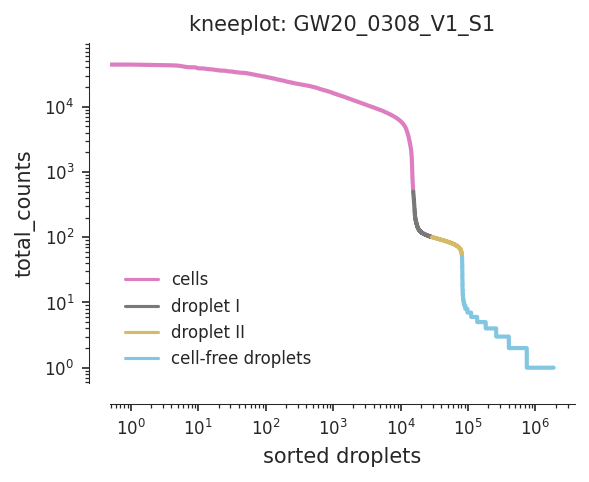

In [98]:
## run scAR (stole this code from Chang)
rank_UMIs = pd.DataFrame(data_rna[:,data_rna.var['feature_types']=='Gene Expression'].X.sum(axis=1), index = data_rna.obs_names, columns=['total_counts'])
rank_UMIs['droplets'] = 'cell-free droplets'
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>50, 'droplet II')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>100, 'droplet I')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>500, 'cells')
rank_UMIs = rank_UMIs.sort_values(by='total_counts', ascending=False).reset_index().rename_axis("rank").reset_index()
rank_UMIs = rank_UMIs.loc[rank_UMIs['total_counts']>0]
rank_UMIs = rank_UMIs.set_index('index').rename_axis('cells')


plt.figure(figsize=(4, 3), dpi=150)

ax = sns.lineplot(data = rank_UMIs,
                  x='rank',
                  y='total_counts',
                  hue='droplets',
                  hue_order=['cells', 'droplet I', 'droplet II', 'cell-free droplets'],
                  palette=sns.color_palette()[-4:],
                  markers=False,
                  lw=2)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('sorted droplets');
ax.legend(loc='lower left', ncol=1, title=None, frameon=False)
ax.set_title(f'kneeplot: '+file_idx);

sns.set_palette("muted")
sns.set_style("ticks")
sns.despine(offset=10, trim=False);

In [99]:
## run scAR (stole this code from Chang)
####################
data_rna_filtered = data_rna[data_rna.obs_names.isin(rank_UMIs[rank_UMIs['droplets']=='cells'].index)] # equal to filtered population as cellranger output
data_sticr_filtered = data_sticr[data_sticr.obs_names.isin(data_rna_filtered.obs_names)].to_df() # pandas.DataFrame
data_sticr_filtered_empty_droplets = data_sticr_raw.loc[data_sticr_raw.index.difference(data_sticr_filtered.index)]
data_sticr_filtered_empty_profile = data_sticr_filtered_empty_droplets.sum()/data_sticr_filtered_empty_droplets.sum().sum()    # pandas.Series
scarObj = scAR.model(raw_count=data_sticr_filtered,
                     empty_profile=data_sticr_filtered_empty_profile.values, # In the case of default None, the empty_profile will be calculated by averaging pooled cells
                     scRNAseq_tech='CROPseq')
scarObj.train(epochs=400)
scarObj.inference(feature_type='sgRNAs', cutoff=3)
scarObj.feature_assignment.to_csv(out)
####################

..Running VAE using the following param set:
......scAR mode:  CROPseq
......count model:  binomial
......num_input_feature:  25761
......NN_layer1:  150
......NN_layer2:  100
......latent_space:  15
......dropout_prob:  0
......kld_weight:  1e-05
......lr:  0.001
......lr_step_size:  5
......lr_gamma:  0.97
  Training.....
100%|██████████| 400/400 [1:47:11<00:00, 16.08s/it]
  Inferring .....


In [100]:
## write the final scAR output to a csv
scarObj.feature_assignment.to_csv(out)

In [101]:
## read the final scAR output back in for further validations/manipulations
bc_csv = pd.read_csv(out)
bc_csv

,Unnamed: 0,sgRNAs,n_sgRNAs
0,AAACCCAAGACGGAAA,IndexE_Bit1_F_328-Bit2_F_373-Bit3_F_089t,1
1,AAACCCAAGATAGTGT,Index3_Bit1_F_288-Bit2_F_331-Bit3_F_148t,1
2,AAACCCAAGCTCGACC,IndexE_Bit1_F_301-Bit2_F_109-Bit3_F_170t,1
3,AAACCCAAGCTGGTGA,IndexE_Bit1_F_013-Bit2_F_346-Bit3_F_183t,1
4,AAACCCAAGGAAACGA,IndexE_Bit1_F_107-Bit2_F_441-Bit3_F_437t,1
...,...,...,...
14620,TTTGTTGTCCGCTTAC,Index3_Bit1_F_022-Bit2_F_159-Bit3_F_304t,1
14621,TTTGTTGTCGCACGAC,IndexE_Bit1_F_120-Bit2_F_040-Bit3_F_448t,1
14622,TTTGTTGTCTCATGCC,IndexE_Bit1_F_468-Bit2_F_393-Bit3_F_071t,1
14623,TTTGTTGTCTGTTCAT,IndexE_Bit1_F_254-Bit2_F_056-Bit3_F_397t,1


In [102]:
print('n STICR BCs:')
print(len(np.unique(bc_csv['sgRNAs'])))

n STICR BCs:
10523


In [103]:
bc_csv['n_sgRNAs'].value_counts()

1    14487
2      132
3        5
4        1
Name: n_sgRNAs, dtype: int64

In [104]:
sticr_tsv['UMI_Count'].value_counts()

1      168736
2        8643
3        3049
4        2176
5        1799
        ...  
92          1
184         1
90          1
76          1
188         1
Name: UMI_Count, Length: 142, dtype: int64

In [105]:
for n in np.unique(bc_csv.n_sgRNAs):
    print('Number of barcodes in clone: ',str(n))
    print('Total number of cells with given barcodes:')
    print(sum(bc_csv.n_sgRNAs==n))
    print('Unique number of barcodes:')
    print(len(np.unique(bc_csv.loc[bc_csv.n_sgRNAs==n,:].sgRNAs)))
    print('')

Number of barcodes in clone:  1
Total number of cells with given barcodes:
14487
Unique number of barcodes:
10385

Number of barcodes in clone:  2
Total number of cells with given barcodes:
132
Unique number of barcodes:
132

Number of barcodes in clone:  3
Total number of cells with given barcodes:
5
Unique number of barcodes:
5

Number of barcodes in clone:  4
Total number of cells with given barcodes:
1
Unique number of barcodes:
1



In [106]:
bc_csv.columns=['CBC','Clone_barcodes','n_barcodes']
clone_data_df = pd.DataFrame(bc_csv.Clone_barcodes.value_counts())

In [108]:
clone_ids = []
exp_prefix='LS34'
for i in range(0,len(clone_data_df)):
    clone_ids.append(exp_prefix+'_Clone_'+str(i))

In [109]:
clone_data_df['Clone_IDs']=clone_ids

In [110]:
clone_data_df.columns=['Clone_size','Clone_IDs']

In [111]:
clone_index = []
for i in range(0,len(clone_data_df)):
    clone_index.append(clone_data_df.index[i][0:6])

In [112]:
clone_data_df['Clone_Index']=clone_index

In [113]:
clone_data_df

,Clone_size,Clone_IDs,Clone_Index
IndexE_Bit1_F_061-Bit2_F_468-Bit3_F_179t,24,LS34_Clone_0,IndexE
IndexE_Bit1_F_045-Bit2_F_200-Bit3_F_085t,22,LS34_Clone_1,IndexE
IndexE_Bit1_F_500-Bit2_F_343-Bit3_F_267t,21,LS34_Clone_2,IndexE
IndexE_Bit1_F_156-Bit2_F_167-Bit3_F_423t,20,LS34_Clone_3,IndexE
IndexE_Bit1_F_494-Bit2_F_482-Bit3_F_307t,17,LS34_Clone_4,IndexE
...,...,...,...
Index3_Bit1_F_052-Bit2_F_407-Bit3_F_366t,1,LS34_Clone_10518,Index3
IndexE_Bit1_F_327-Bit2_F_312-Bit3_F_098t,1,LS34_Clone_10519,IndexE
IndexE_Bit1_F_094-Bit2_F_291-Bit3_F_439t,1,LS34_Clone_10520,IndexE
IndexE_Bit1_F_118-Bit2_F_442-Bit3_F_419t,1,LS34_Clone_10521,IndexE


In [114]:
clone_data_df['Clone_size'].value_counts()

1     8346
2     1375
3      417
4      166
5       90
6       39
7       22
8       17
9       14
10       9
14       7
12       6
17       4
15       3
11       2
16       2
22       1
20       1
21       1
24       1
Name: Clone_size, dtype: int64

In [115]:
bc_csv = bc_csv.merge(clone_data_df, left_on='Clone_barcodes', right_index=True)

In [116]:
bc_csv.to_csv('/media/chang/HDD-4/mgkeefe/230317_local_STICR/barcodes/bc_outs_V1_S1/'+file_idx+'_bcs_final_metadata.csv')

## new processing for 230308 V1 S2:

In [121]:
## load in the Final_Barcodes.tsv output from the STICR pipeline
sticr_tsv = pd.read_csv('/media/chang/HDD-4/mgkeefe/230317_local_STICR/barcodes/bc_outs_V1_S2/Final_Barcodes.tsv',
                           sep='\t')
sticr_tsv.index = list(sticr_tsv['CBC'])

In [122]:
## generate a matrix of zeroes with dimensions CBCs (rows) by STICR BCs (columns)
cbc_names = np.unique(sticr_tsv['CBC'])
bc_names = np.unique(sticr_tsv['barcode'])
bc_matrix = np.zeros((len(np.unique(cbc_names)), len(np.unique(bc_names))))
bc_df = pd.DataFrame(bc_matrix, index=list(cbc_names), columns=list(bc_names))

In [123]:
## iterate through every STICR BC and pull the UMI values for a given CBC and map them into the matrix of cells by barcodes
from tqdm import tqdm

for sbc in tqdm(bc_names):
    bc_df.loc[bc_df.index.isin(sticr_tsv['CBC'][sticr_tsv['barcode']==sbc]), bc_df.columns==sbc] = sticr_tsv.loc[sticr_tsv['barcode']==sbc,'UMI_Count']

100%|██████████| 31845/31845 [22:34<00:00, 23.51it/s]


In [124]:
## compress the dataframe by turning it into a sparse matrix, which is the input for scanpy
## note: this used to be done in R with DropletUtils, but that stopped working for some reason so doing it this way instead
from scipy.sparse import csr_matrix
import h5sparse
import h5py
import anndata
bc_df_sparse = csr_matrix(bc_df)

In [125]:
file_idx = 'GW20_0308_V1_S2'

In [126]:
## convert the sparse matrix back into a dataframe, then parse it with AnnData for scanpy input
## save the scanpy input in h5 format so that the slow matrix generation doesn't have to be done again
bc_df_reformat = pd.DataFrame.sparse.from_spmatrix(bc_df_sparse, index=bc_df.index, columns=bc_df.columns)
bc_df_sc_input = anndata.AnnData(bc_df_reformat)
bc_df_sc_input.write_h5ad('/media/chang/HDD-4/mgkeefe/230317_local_STICR/barcodes/bc_outs_V1_S2/'+file_idx+'_bc_matrix_sparse.h5ad')

In [127]:
## load in the cellranger output and barcode matrix
rna = '/media/chang/HDD-4/mgkeefe/230317_local_STICR/transcriptome/cellranger_outs/GW20_230308_sub_FBS_V1_S2_cellranger/raw_feature_bc_matrix.h5'
sticr = '/media/chang/HDD-4/mgkeefe/230317_local_STICR/barcodes/bc_outs_V1_S2/'+file_idx+'_bc_matrix_sparse.h5ad'
out = '/media/chang/HDD-4/mgkeefe/230317_local_STICR/barcodes/bc_outs_V1_S2/'+file_idx+'_scAR_bcs.csv'
data_rna = sc.read_10x_h5(filename=rna, gex_only=True) # Change this if ur using a different scRNA-seq format
data_sticr = sc.read_h5ad(sticr)
data_sticr_raw = data_sticr.to_df()
data_sticr.var_names_make_unique()

In [128]:
## fix the names in the RNA file to remove the -1 from the CBC
fixed_rna_names = data_rna.obs_names.tolist()
for c in range(0, len(fixed_rna_names)):
    fixed_rna_names[c] = fixed_rna_names[c][0:-2]
print('old names:')
print(data_rna.obs_names[0:10].tolist())
print('fixed names:')
print(fixed_rna_names[0:10])
data_rna.obs_names = fixed_rna_names
print('cell names from cellranger:')
print(data_rna.obs_names[:10].tolist())
print('cell names from STICR processing:')
print(data_sticr.obs_names[:10].tolist())

old names:
['AAACCCAAGAAACACT-1', 'AAACCCAAGAAACCAT-1', 'AAACCCAAGAAACCCA-1', 'AAACCCAAGAAACTAC-1', 'AAACCCAAGAAACTCA-1', 'AAACCCAAGAAATCCA-1', 'AAACCCAAGAAATTGC-1', 'AAACCCAAGAACAAGG-1', 'AAACCCAAGAACAGGA-1', 'AAACCCAAGAACCCGA-1']
fixed names:
['AAACCCAAGAAACACT', 'AAACCCAAGAAACCAT', 'AAACCCAAGAAACCCA', 'AAACCCAAGAAACTAC', 'AAACCCAAGAAACTCA', 'AAACCCAAGAAATCCA', 'AAACCCAAGAAATTGC', 'AAACCCAAGAACAAGG', 'AAACCCAAGAACAGGA', 'AAACCCAAGAACCCGA']
cell names from cellranger:
['AAACCCAAGAAACACT', 'AAACCCAAGAAACCAT', 'AAACCCAAGAAACCCA', 'AAACCCAAGAAACTAC', 'AAACCCAAGAAACTCA', 'AAACCCAAGAAATCCA', 'AAACCCAAGAAATTGC', 'AAACCCAAGAACAAGG', 'AAACCCAAGAACAGGA', 'AAACCCAAGAACCCGA']
cell names from STICR processing:
['AAACCCAAGAAGATCT', 'AAACCCAAGACAACAT', 'AAACCCAAGACAACTA', 'AAACCCAAGACACACG', 'AAACCCAAGACTTGTC', 'AAACCCAAGAGAGTTT', 'AAACCCAAGATCCCAT', 'AAACCCAAGATGACAC', 'AAACCCAAGCAGCAGT', 'AAACCCAAGCAGGCTA']


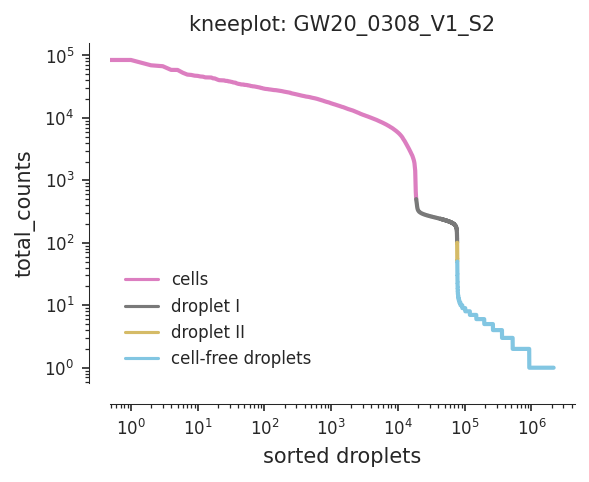

In [129]:
## run scAR (stole this code from Chang)
rank_UMIs = pd.DataFrame(data_rna[:,data_rna.var['feature_types']=='Gene Expression'].X.sum(axis=1), index = data_rna.obs_names, columns=['total_counts'])
rank_UMIs['droplets'] = 'cell-free droplets'
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>50, 'droplet II')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>100, 'droplet I')
rank_UMIs['droplets'] = rank_UMIs['droplets'].mask(rank_UMIs['total_counts']>500, 'cells')
rank_UMIs = rank_UMIs.sort_values(by='total_counts', ascending=False).reset_index().rename_axis("rank").reset_index()
rank_UMIs = rank_UMIs.loc[rank_UMIs['total_counts']>0]
rank_UMIs = rank_UMIs.set_index('index').rename_axis('cells')


plt.figure(figsize=(4, 3), dpi=150)

ax = sns.lineplot(data = rank_UMIs,
                  x='rank',
                  y='total_counts',
                  hue='droplets',
                  hue_order=['cells', 'droplet I', 'droplet II', 'cell-free droplets'],
                  palette=sns.color_palette()[-4:],
                  markers=False,
                  lw=2)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('sorted droplets');
ax.legend(loc='lower left', ncol=1, title=None, frameon=False)
ax.set_title(f'kneeplot: '+file_idx);

sns.set_palette("muted")
sns.set_style("ticks")
sns.despine(offset=10, trim=False);

In [130]:
## run scAR (stole this code from Chang)
####################
data_rna_filtered = data_rna[data_rna.obs_names.isin(rank_UMIs[rank_UMIs['droplets']=='cells'].index)] # equal to filtered population as cellranger output
data_sticr_filtered = data_sticr[data_sticr.obs_names.isin(data_rna_filtered.obs_names)].to_df() # pandas.DataFrame
data_sticr_filtered_empty_droplets = data_sticr_raw.loc[data_sticr_raw.index.difference(data_sticr_filtered.index)]
data_sticr_filtered_empty_profile = data_sticr_filtered_empty_droplets.sum()/data_sticr_filtered_empty_droplets.sum().sum()    # pandas.Series
scarObj = scAR.model(raw_count=data_sticr_filtered,
                     empty_profile=data_sticr_filtered_empty_profile.values, # In the case of default None, the empty_profile will be calculated by averaging pooled cells
                     scRNAseq_tech='CROPseq')
scarObj.train(epochs=400)
scarObj.inference(feature_type='sgRNAs', cutoff=3)
scarObj.feature_assignment.to_csv(out)
####################

..Running VAE using the following param set:
......scAR mode:  CROPseq
......count model:  binomial
......num_input_feature:  31845
......NN_layer1:  150
......NN_layer2:  100
......latent_space:  15
......dropout_prob:  0
......kld_weight:  1e-05
......lr:  0.001
......lr_step_size:  5
......lr_gamma:  0.97
  Training.....
100%|██████████| 400/400 [2:49:50<00:00, 25.48s/it]  
  Inferring .....


In [131]:
## write the final scAR output to a csv
scarObj.feature_assignment.to_csv(out)

In [132]:
## read the final scAR output back in for further validations/manipulations
bc_csv = pd.read_csv(out)
bc_csv

,Unnamed: 0,sgRNAs,n_sgRNAs
0,AAACCCAAGCATCAGG,IndexE_Bit1_F_064-Bit2_F_156-Bit3_F_286t,1
1,AAACCCAAGCATCCTA,IndexE_Bit1_F_162-Bit2_F_284-Bit3_F_500t,1
2,AAACCCAAGGATCACG,IndexE_Bit1_F_122-Bit2_F_356-Bit3_F_456t,1
3,AAACCCAAGGTAGATT,IndexE_Bit1_F_035-Bit2_F_160-Bit3_F_326t,1
4,AAACCCACAATAACGA,IndexE_Bit1_F_198-Bit2_F_147-Bit3_F_290t,1
...,...,...,...
18203,TTTGTTGGTTTAGAGA,IndexE_Bit1_F_327-Bit2_F_291-Bit3_F_335t,1
18204,TTTGTTGTCCATCAGA,IndexE_Bit1_F_200-Bit2_F_002-Bit3_F_070t,1
18205,TTTGTTGTCCTCAGGG,IndexE_Bit1_F_180-Bit2_F_435-Bit3_F_004t,1
18206,TTTGTTGTCGTGGGAA,IndexE_Bit1_F_273-Bit2_F_375-Bit3_F_477t,1


In [133]:
print('n STICR BCs:')
print(len(np.unique(bc_csv['sgRNAs'])))

n STICR BCs:
12254


In [134]:
bc_csv['n_sgRNAs'].value_counts()

1    17845
2      344
3       15
4        2
6        1
5        1
Name: n_sgRNAs, dtype: int64

In [135]:
sticr_tsv['UMI_Count'].value_counts()

1      284036
2       11093
3        2999
4        1906
5        1587
        ...  
171         1
129         1
132         1
159         1
108         1
Name: UMI_Count, Length: 155, dtype: int64

In [136]:
for n in np.unique(bc_csv.n_sgRNAs):
    print('Number of barcodes in clone: ',str(n))
    print('Total number of cells with given barcodes:')
    print(sum(bc_csv.n_sgRNAs==n))
    print('Unique number of barcodes:')
    print(len(np.unique(bc_csv.loc[bc_csv.n_sgRNAs==n,:].sgRNAs)))
    print('')

Number of barcodes in clone:  1
Total number of cells with given barcodes:
17845
Unique number of barcodes:
11893

Number of barcodes in clone:  2
Total number of cells with given barcodes:
344
Unique number of barcodes:
342

Number of barcodes in clone:  3
Total number of cells with given barcodes:
15
Unique number of barcodes:
15

Number of barcodes in clone:  4
Total number of cells with given barcodes:
2
Unique number of barcodes:
2

Number of barcodes in clone:  5
Total number of cells with given barcodes:
1
Unique number of barcodes:
1

Number of barcodes in clone:  6
Total number of cells with given barcodes:
1
Unique number of barcodes:
1



In [137]:
bc_csv.columns=['CBC','Clone_barcodes','n_barcodes']
clone_data_df = pd.DataFrame(bc_csv.Clone_barcodes.value_counts())

In [138]:
clone_ids = []
exp_prefix='LS35'
for i in range(0,len(clone_data_df)):
    clone_ids.append(exp_prefix+'_Clone_'+str(i))

In [139]:
clone_data_df['Clone_IDs']=clone_ids

In [140]:
clone_data_df.columns=['Clone_size','Clone_IDs']

In [141]:
clone_index = []
for i in range(0,len(clone_data_df)):
    clone_index.append(clone_data_df.index[i][0:6])

In [142]:
clone_data_df['Clone_Index']=clone_index

In [143]:
clone_data_df

,Clone_size,Clone_IDs,Clone_Index
IndexE_Bit1_F_005-Bit2_F_272-Bit3_F_269t,29,LS35_Clone_0,IndexE
IndexE_Bit1_F_043-Bit2_F_108-Bit3_F_445t,22,LS35_Clone_1,IndexE
IndexE_Bit1_F_193-Bit2_F_016-Bit3_F_349t,22,LS35_Clone_2,IndexE
IndexE_Bit1_F_140-Bit2_F_271-Bit3_F_333t,19,LS35_Clone_3,IndexE
IndexE_Bit1_F_167-Bit2_F_138-Bit3_F_078t,19,LS35_Clone_4,IndexE
...,...,...,...
IndexE_Bit1_F_021-Bit2_F_263-Bit3_F_361t,1,LS35_Clone_12249,IndexE
Index3_Bit1_F_259-Bit2_F_168-Bit3_F_439t,1,LS35_Clone_12250,Index3
Index3_Bit1_F_018-Bit2_F_284-Bit3_F_499t,1,LS35_Clone_12251,Index3
IndexE_Bit1_F_266-Bit2_F_307-Bit3_F_095t,1,LS35_Clone_12252,IndexE


In [144]:
clone_data_df['Clone_size'].value_counts()

1     9123
2     2034
3      566
4      205
5      103
6       57
7       41
8       39
9       25
12      14
10      11
11       9
13       7
14       4
16       4
17       4
22       2
18       2
19       2
15       1
29       1
Name: Clone_size, dtype: int64

In [145]:
bc_csv = bc_csv.merge(clone_data_df, left_on='Clone_barcodes', right_index=True)

In [146]:
bc_csv.to_csv('/media/chang/HDD-4/mgkeefe/230317_local_STICR/barcodes/bc_outs_V1_S2/'+file_idx+'_bcs_final_metadata.csv')